# The Robert and Rosenbaum Uncertainty Zones model

# An application to EURUSD FX Futures at CME

## Implementation by
## Marcos Costa Santos Carreira (École Polytechnique - CMAP)
## and
## Florian Huchedé (CME)
## Aug-2019

## Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import glob

In [2]:
pd.set_option('display.max_columns', 50)

In [3]:
pd.set_option('display.max_rows', 200)

In [4]:
import cme_processing as cme

## File paths and initial values

In [5]:
PATHPROJ = '/Users/marcoscscarreira/Documents/X/CME project/CME_data/'
URL_ROOT = 'https://raw.githubusercontent.com/MarcosCarreira/UZStats/master/CME_data/'

In [6]:
CURR = 'EUR'

In [7]:
PATH_PRIOR = PATHPROJ+CURR+'/prior/'
PATH_AFTER = PATHPROJ+CURR+'/after/'
URL_1 = CURR+'/prior/'
URL_2 = CURR+'/after/'
#PATH_PRIOR = URL_ROOT+URL_1
#PATH_AFTER = URL_ROOT+URL_2

In [8]:
TRADING_HOURS = 8

In [9]:
TICK_PRIOR = 1.0
TICK_AFTER = 0.5

In [10]:
PRIOR_CDATES_LIST = [['6EU5', '20150615'], ['6EU5', '20150616'], ['6EU5', '20150617'],\
    ['6EU5', '20150618'], ['6EU5', '20150619'], ['6EU5', '20150622'], ['6EU5', '20150623'],\
    ['6EU5', '20150624'], ['6EU5', '20150625'], ['6EU5', '20150626'], ['6EU5', '20150629'],\
    ['6EU5', '20150630'], ['6EU5', '20150701'], ['6EU5', '20150702'], ['6EU5', '20150703'],\
    ['6EU5', '20150706'], ['6EU5', '20150707'], ['6EU5', '20150708'], ['6EU5', '20150709'],\
    ['6EU5', '20150710'], ['6EU5', '20150713'], ['6EU5', '20150714'], ['6EU5', '20150715'],\
    ['6EU5', '20150716'], ['6EU5', '20150717'], ['6EU5', '20150720'], ['6EU5', '20150721'],\
    ['6EU5', '20150722'], ['6EU5', '20150723'], ['6EU5', '20150724'], ['6EU5', '20150727'],\
    ['6EU5', '20150728'], ['6EU5', '20150729'], ['6EU5', '20150730'], ['6EU5', '20150731'],\
    ['6EU5', '20150803'], ['6EU5', '20150804'], ['6EU5', '20150805'], ['6EU5', '20150806'],\
    ['6EU5', '20150807'], ['6EU5', '20150810'], ['6EU5', '20150811'], ['6EU5', '20150812'],\
    ['6EU5', '20150813'], ['6EU5', '20150814'], ['6EU5', '20150817'], ['6EU5', '20150818'],\
    ['6EU5', '20150819'], ['6EU5', '20150820'], ['6EU5', '20150821'], ['6EU5', '20150824'],\
    ['6EU5', '20150825'], ['6EU5', '20150826'], ['6EU5', '20150827'], ['6EU5', '20150828'],\
    ['6EU5', '20150831'], ['6EU5', '20150901'], ['6EU5', '20150902'], ['6EU5', '20150903'],\
    ['6EU5', '20150904'], ['6EU5', '20150907'], ['6EU5', '20150908'], ['6EU5', '20150909'],\
    ['6EU5', '20150910'], ['6EU5', '20150911'], ['6EZ5', '20150914'], ['6EZ5', '20150915'],\
    ['6EZ5', '20150916'], ['6EZ5', '20150917'], ['6EZ5', '20150918'], ['6EZ5', '20150921'],\
    ['6EZ5', '20150922'], ['6EZ5', '20150923'], ['6EZ5', '20150924'], ['6EZ5', '20150925'],\
    ['6EZ5', '20150928'], ['6EZ5', '20150929'], ['6EZ5', '20150930'], ['6EZ5', '20151001'],\
    ['6EZ5', '20151002'], ['6EZ5', '20151005'], ['6EZ5', '20151006'], ['6EZ5', '20151007'],\
    ['6EZ5', '20151008'], ['6EZ5', '20151009'], ['6EZ5', '20151012'], ['6EZ5', '20151013'],\
    ['6EZ5', '20151014'], ['6EZ5', '20151015'], ['6EZ5', '20151016'], ['6EZ5', '20151019'],\
    ['6EZ5', '20151020'], ['6EZ5', '20151021'], ['6EZ5', '20151022'], ['6EZ5', '20151023'],\
    ['6EZ5', '20151026'], ['6EZ5', '20151027'], ['6EZ5', '20151028'], ['6EZ5', '20151029'],\
    ['6EZ5', '20151030'], ['6EZ5', '20151102'], ['6EZ5', '20151103'], ['6EZ5', '20151104'],\
    ['6EZ5', '20151105'], ['6EZ5', '20151106'], ['6EZ5', '20151109'], ['6EZ5', '20151110'],\
    ['6EZ5', '20151111'], ['6EZ5', '20151112'], ['6EZ5', '20151113'], ['6EZ5', '20151116'],\
    ['6EZ5', '20151117'], ['6EZ5', '20151118'], ['6EZ5', '20151119'], ['6EZ5', '20151120'],\
    ['6EZ5', '20151123'], ['6EZ5', '20151124'], ['6EZ5', '20151125'], ['6EZ5', '20151126'],\
    ['6EZ5', '20151127'], ['6EZ5', '20151130'], ['6EZ5', '20151201'], ['6EZ5', '20151202'],\
    ['6EZ5', '20151203'], ['6EZ5', '20151204'], ['6EZ5', '20151207'], ['6EZ5', '20151208'],\
    ['6EZ5', '20151209'], ['6EZ5', '20151210'], ['6EZ5', '20151211'], ['x6EH6', '20151214'],\
    ['x6EH6', '20151215'], ['x6EH6', '20151216'], ['x6EH6', '20151217'], ['x6EH6', '20151218'],\
    ['x6EH6', '20151221'], ['x6EH6', '20151222'], ['x6EH6', '20151223'], ['x6EH6', '20160104'],\
    ['x6EH6', '20160105'], ['x6EH6', '20160106'], ['x6EH6', '20160107'], ['x6EH6', '20160108']]

In [11]:
AFTER_CDATES_LIST = [['x6EH6', '20160111'], ['x6EH6', '20160112'], ['x6EH6', '20160113'],\
    ['x6EH6', '20160114'], ['x6EH6', '20160115'], ['x6EH6', '20160118'], ['x6EH6', '20160119'],\
    ['x6EH6', '20160120'], ['x6EH6', '20160121'], ['x6EH6', '20160122'], ['x6EH6', '20160125'],\
    ['x6EH6', '20160126'], ['x6EH6', '20160127'], ['x6EH6', '20160128'], ['x6EH6', '20160129'],\
    ['x6EH6', '20160201'], ['x6EH6', '20160202'], ['x6EH6', '20160203'], ['x6EH6', '20160204'],\
    ['x6EH6', '20160205'], ['x6EH6', '20160208'], ['x6EH6', '20160209'], ['x6EH6', '20160210'],\
    ['x6EH6', '20160211'], ['x6EH6', '20160212'], ['x6EH6', '20160215'], ['x6EH6', '20160216'],\
    ['x6EH6', '20160217'], ['x6EH6', '20160218'], ['x6EH6', '20160219'], ['x6EH6', '20160222'],\
    ['x6EH6', '20160223'], ['x6EH6', '20160224'], ['x6EH6', '20160225'], ['x6EH6', '20160226'],\
    ['x6EH6', '20160229'], ['x6EH6', '20160301'], ['x6EH6', '20160302'], ['x6EH6', '20160303'],\
    ['x6EH6', '20160304'], ['x6EH6', '20160307'], ['x6EH6', '20160308'], ['x6EH6', '20160309'],\
    ['x6EH6', '20160310'], ['x6EH6', '20160311'], ['x6EM6', '20160314'], ['x6EM6', '20160315'],\
    ['x6EM6', '20160316'], ['x6EM6', '20160317'], ['x6EM6', '20160318'], ['x6EM6', '20160321'],\
    ['x6EM6', '20160322'], ['x6EM6', '20160323'], ['x6EM6', '20160324'], ['x6EM6', '20160328'],\
    ['x6EM6', '20160329'], ['x6EM6', '20160330'], ['x6EM6', '20160331'], ['x6EM6', '20160401'],\
    ['x6EM6', '20160404'], ['x6EM6', '20160405'], ['x6EM6', '20160406'], ['x6EM6', '20160407'],\
    ['x6EM6', '20160408'], ['x6EM6', '20160411'], ['x6EM6', '20160412'], ['x6EM6', '20160413'],\
    ['x6EM6', '20160414'], ['x6EM6', '20160415'], ['x6EM6', '20160418'], ['x6EM6', '20160419'],\
    ['x6EM6', '20160420'], ['x6EM6', '20160421'], ['x6EM6', '20160422'], ['x6EM6', '20160425'],\
    ['x6EM6', '20160426'], ['x6EM6', '20160427'], ['x6EM6', '20160428'], ['x6EM6', '20160429'],\
    ['x6EM6', '20160502'], ['x6EM6', '20160503'], ['x6EM6', '20160504'], ['x6EM6', '20160505'],\
    ['x6EM6', '20160506'], ['x6EM6', '20160509'], ['x6EM6', '20160510'], ['x6EM6', '20160511'],\
    ['x6EM6', '20160512'], ['x6EM6', '20160513'], ['x6EM6', '20160516'], ['x6EM6', '20160517'],\
    ['x6EM6', '20160518'], ['x6EM6', '20160519'], ['x6EM6', '20160520'], ['x6EM6', '20160523'],\
    ['x6EM6', '20160524'], ['x6EM6', '20160525'], ['x6EM6', '20160526'], ['x6EM6', '20160527'],\
    ['x6EM6', '20160530'], ['x6EM6', '20160531'], ['x6EM6', '20160601'], ['x6EM6', '20160602'],\
    ['x6EM6', '20160603'], ['x6EM6', '20160606'], ['x6EM6', '20160607'], ['x6EM6', '20160608'],\
    ['x6EM6', '20160609'], ['x6EM6', '20160610']]

### Processing files

#### Prior

In [12]:
#PRIOR_CDATES_LIST = cme.list_files(PATH_PRIOR)

In [13]:
#PRIOR_CDATES_LIST

In [14]:
PRIOR_CDATES, FILES_PRIOR_CAticks, FILES_PRIOR_COSTtrades,\
    FILES_PRIOR_OBstats, FILES_PRIOR_OTtrans,\
    FILES_PRIOR_RDFtrans, FILES_PRIOR_UZstats = \
    cme.process_files(PATH_PRIOR, PRIOR_CDATES_LIST, 'prior', TICK_PRIOR)

In [15]:
PRIOR_OB_UZ_STATS = cme.ob_uz_stats(PRIOR_CDATES, FILES_PRIOR_OBstats,\
    FILES_PRIOR_UZstats, FILES_PRIOR_CAticks, TRADING_HOURS)

In [16]:
PRIOR_IMBAL_STATS = cme.imbal_stats(PRIOR_CDATES, FILES_PRIOR_OTtrans)

In [17]:
PRIOR_IMBAL_STATS_TS = cme.time_series_imbal(PRIOR_IMBAL_STATS, pd.to_datetime(PRIOR_CDATES['Date']), 'prior')

In [18]:
PRIOR_IMBAL_STATS_TS['eta1'] = PRIOR_OB_UZ_STATS['eta1'].values

In [19]:
PRIOR_TRADE_STATS_TS = cme.time_series_imbal_trd(PRIOR_IMBAL_STATS, pd.to_datetime(PRIOR_CDATES['Date']), 'prior')

In [20]:
PRIOR_DEPL_STATS = cme.depl_stats(PRIOR_CDATES, FILES_PRIOR_RDFtrans)

In [21]:
PRIOR_DEPL_STATS_TS = cme.time_series_depl(PRIOR_DEPL_STATS, pd.to_datetime(PRIOR_CDATES['Date']), 'prior')

In [22]:
PRIOR_DEPL_STATS_TS['eta1'] = PRIOR_OB_UZ_STATS['eta1'].values

In [23]:
PRIOR_ABSDEPL_STATS_TS = cme.time_series_absdepl(PRIOR_DEPL_STATS, pd.to_datetime(PRIOR_CDATES['Date']), 'prior')

In [24]:
PRIOR_ABSDEPL_STATS_TS['eta1'] = PRIOR_OB_UZ_STATS['eta1'].values
PRIOR_ABSDEPL_STATS_TS['M'] = PRIOR_OB_UZ_STATS['M'].values

In [25]:
PRIOR_COST_STATS = cme.cost_stats(PRIOR_CDATES, FILES_PRIOR_COSTtrades)

In [26]:
PRIOR_COST_STATS['Status'] = 'prior'

#### After

In [27]:
#AFTER_CDATES_LIST = cme.list_files(PATH_AFTER)

In [28]:
#AFTER_CDATES_LIST

In [29]:
AFTER_CDATES, FILES_AFTER_CAticks, FILES_AFTER_COSTtrades,\
    FILES_AFTER_OBstats, FILES_AFTER_OTtrans,\
    FILES_AFTER_RDFtrans, FILES_AFTER_UZstats = \
    cme.process_files(PATH_AFTER, AFTER_CDATES_LIST, 'after', TICK_AFTER)

In [30]:
AFTER_OB_UZ_STATS = cme.ob_uz_stats(AFTER_CDATES, FILES_AFTER_OBstats,\
    FILES_AFTER_UZstats, FILES_AFTER_CAticks, TRADING_HOURS)

In [31]:
AFTER_IMBAL_STATS = cme.imbal_stats(AFTER_CDATES, FILES_AFTER_OTtrans)

In [32]:
AFTER_IMBAL_STATS_TS = cme.time_series_imbal(AFTER_IMBAL_STATS, pd.to_datetime(AFTER_CDATES['Date']), 'after')

In [33]:
AFTER_IMBAL_STATS_TS['eta1'] = AFTER_OB_UZ_STATS['eta1'].values

In [34]:
AFTER_TRADE_STATS_TS = cme.time_series_imbal_trd(AFTER_IMBAL_STATS, pd.to_datetime(AFTER_CDATES['Date']), 'after')

In [35]:
AFTER_DEPL_STATS = cme.depl_stats(AFTER_CDATES, FILES_AFTER_RDFtrans)

In [36]:
AFTER_DEPL_STATS_TS = cme.time_series_depl(AFTER_DEPL_STATS, pd.to_datetime(AFTER_CDATES['Date']), 'after')

In [37]:
AFTER_DEPL_STATS_TS['eta1'] = AFTER_OB_UZ_STATS['eta1'].values

In [38]:
AFTER_ABSDEPL_STATS_TS = cme.time_series_absdepl(AFTER_DEPL_STATS, pd.to_datetime(AFTER_CDATES['Date']), 'after')

In [39]:
AFTER_ABSDEPL_STATS_TS['eta1'] = AFTER_OB_UZ_STATS['eta1'].values
AFTER_ABSDEPL_STATS_TS['M'] = AFTER_OB_UZ_STATS['M'].values

In [40]:
AFTER_COST_STATS = cme.cost_stats(AFTER_CDATES, FILES_AFTER_COSTtrades)

In [41]:
AFTER_COST_STATS['Status'] = 'after'

#### Join prior and after

In [42]:
OB_UZ_STATS = pd.concat([PRIOR_OB_UZ_STATS, AFTER_OB_UZ_STATS], sort=False)

In [43]:
IMBAL_STATS_TS = pd.concat([PRIOR_IMBAL_STATS_TS, AFTER_IMBAL_STATS_TS], sort=False)

In [44]:
TRADE_STATS_TS = pd.concat([PRIOR_TRADE_STATS_TS, AFTER_TRADE_STATS_TS], sort=False)

In [45]:
DEPL_STATS_TS = pd.concat([PRIOR_DEPL_STATS_TS, AFTER_DEPL_STATS_TS], sort=False)

In [46]:
ABSDEPL_STATS_TS = pd.concat([PRIOR_ABSDEPL_STATS_TS, AFTER_ABSDEPL_STATS_TS], sort=False)

### Tables

In [47]:
TABLE_MATHIEU = cme.table_mathieu(OB_UZ_STATS)
TABLE_MATHIEU_ERR = cme.table_mathieu_err(OB_UZ_STATS)

In [48]:
TABLE_MATHIEU

,Tick,chgavg,ndfpr_pred,ndfpr,M,Volume,eta1,S1,lambda1,twspr1,duration,dt_avg,rvxe,spot_avg
Status,,,,,,,,,,,,,,
prior,1.0,1.02512,6353.77629,5305.30769,29594.02797,123379.33566,0.27275,0.98247,0.98211,1.0795,6.75133,6.98122,0.00502,11059.29584
after,0.5,0.53695,13933.73475,10053.65138,34444.03670,103885.55046,0.36391,0.91773,0.93818,1.3534,3.16392,3.70119,0.00425,11188.67375


In [49]:
TABLE_MATHIEU_ERR

,Tick,chgavg,ndfpr_pred,ndfpr,M,Volume,eta1,S1,lambda1,twspr1,duration,dt_avg,rvxe,spot_avg
Status,,,,,,,,,,,,,,
prior,0.0,0.03354,5368.22395,3607.53098,16068.80052,58201.90060,0.03484,0.01488,0.02151,0.05261,5.04906,3.58378,0.00184,225.70542
after,0.0,0.02919,12261.33823,6571.33754,17112.52426,49303.78367,0.02859,0.04243,0.04083,0.12583,2.37358,1.97312,0.00166,193.86091


In [50]:
cme.avg_perc_mat(PRIOR_IMBAL_STATS, pd.to_datetime(PRIOR_CDATES['Date']))

,Trade_Bid,Imbal_Bid,Neutral,Imbal_Ask,Trade_Ask,Total Cols
Trade_Bid,1.24,1.45,0.37,0.11,0.00,3.17
Imbal_Bid,0.90,26.59,1.37,0.10,0.33,29.28
Neutral,0.70,1.04,31.73,1.05,0.69,35.20
Imbal_Ask,0.33,0.10,1.37,26.49,0.90,29.19
Trade_Ask,0.00,0.11,0.36,1.45,1.23,3.15
Total Rows,3.17,29.28,35.20,29.19,3.15,100.00


In [51]:
cme.avg_perc_mat(AFTER_IMBAL_STATS, pd.to_datetime(AFTER_CDATES['Date']))

,Trade_Bid,Imbal_Bid,Neutral,Imbal_Ask,Trade_Ask,Total Cols
Trade_Bid,0.06,1.00,0.50,0.13,0.00,1.70
Imbal_Bid,0.56,23.61,1.97,0.41,0.42,26.97
Neutral,0.66,1.82,38.40,1.79,0.65,43.32
Imbal_Ask,0.42,0.40,1.95,22.99,0.55,26.32
Trade_Ask,0.00,0.14,0.51,0.99,0.06,1.69
Total Rows,1.70,26.97,43.32,26.32,1.69,100.00


In [52]:
cme.avg_perc_mat_2(PRIOR_DEPL_STATS, pd.to_datetime(PRIOR_CDATES['Date']))

same                     oppo                    Total Cols
             D C   D T  D T+F    F    D C    D T  D T+F   F             
 D C         0.02  0.02  0.09  21.20  0.01   0.01  1.96  0.59      23.90
 D T         0.01  0.10  0.64  15.18  0.02   0.03  3.09  3.55      22.61
D T+F        0.01  0.02  0.22   4.85  0.01   0.01  1.06  0.89       7.07
  F         14.06  6.60  0.00   0.08  9.76  15.83  0.00  0.09      46.42
Total Rows  14.10  6.74  0.95  41.30  9.80  15.87  6.12  5.12     100.00

In [53]:
cme.avg_perc_mat_2(AFTER_DEPL_STATS, pd.to_datetime(AFTER_CDATES['Date']))

same                     oppo                     Total Cols
             D C   D T  D T+F    F    D C    D T  D T+F    F             
 D C         0.06  0.08  0.26  20.15  0.11   0.04  1.19   3.87      25.77
 D T         0.07  0.30  0.58  12.18  0.17   0.11  2.29   6.16      21.87
D T+F        0.05  0.06  0.23   2.64  0.06   0.04  0.46   1.48       5.02
  F         17.92  8.17  0.01   0.36  7.32  13.06  0.00   0.49      47.34
Total Rows  18.10  8.61  1.08  35.33  7.66  13.26  3.94  12.01     100.00

## Charts and Regressions

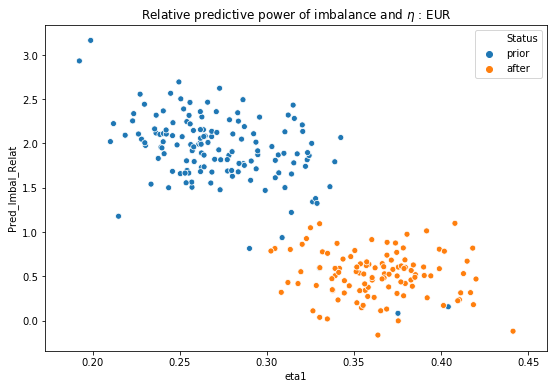

In [54]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='eta1', y='Pred_Imbal_Relat', hue='Status',\
           data=IMBAL_STATS_TS);
plt.title('Relative predictive power of imbalance and $\eta$ : '+CURR);

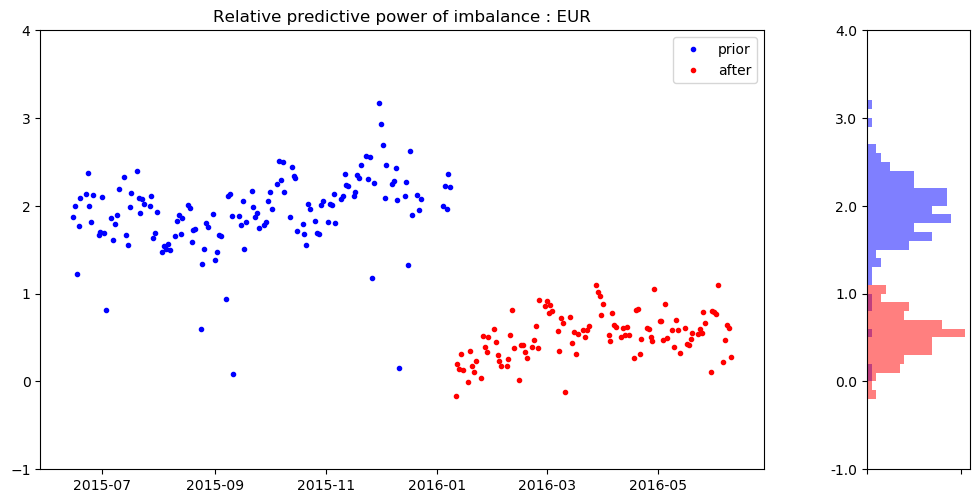

In [55]:
cme.time_series_hist_plot(IMBAL_STATS_TS, 'Pred_Imbal_Relat',\
    'Relative predictive power of imbalance : '+CURR, -1.0, 4.0, 50)

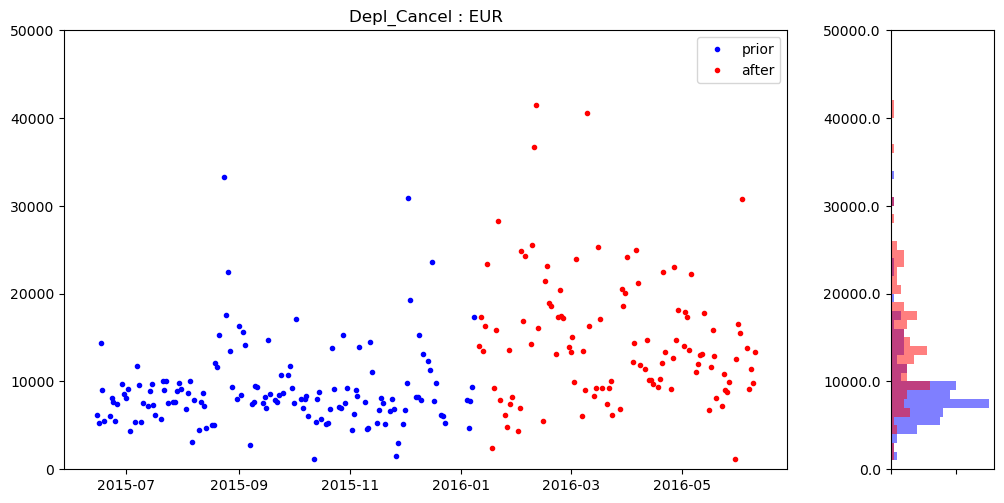

In [56]:
cme.time_series_hist_plot(ABSDEPL_STATS_TS, 'Depl_Cancel',\
    'Depl_Cancel : '+CURR, 0.0, 50000.0, 50)

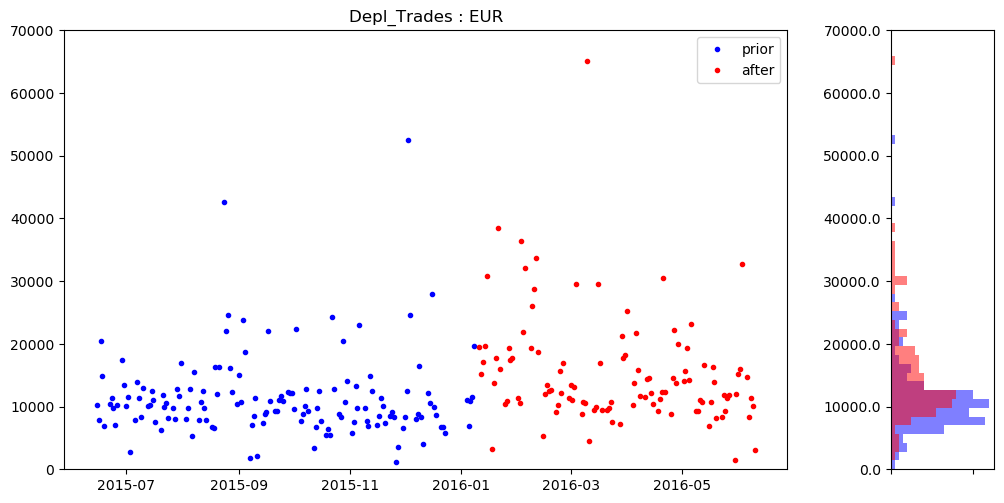

In [57]:
cme.time_series_hist_plot(ABSDEPL_STATS_TS, 'Depl_Trades',\
    'Depl_Trades : '+CURR, 0.0, 70000.0, 50)

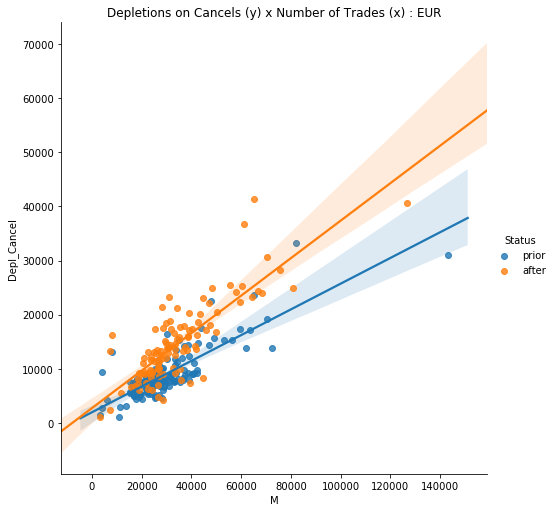

In [58]:
cme.regr_plot(ABSDEPL_STATS_TS, 'M', 'Depl_Cancel',\
    'Depletions on Cancels (y) x Number of Trades (x) : '+CURR)

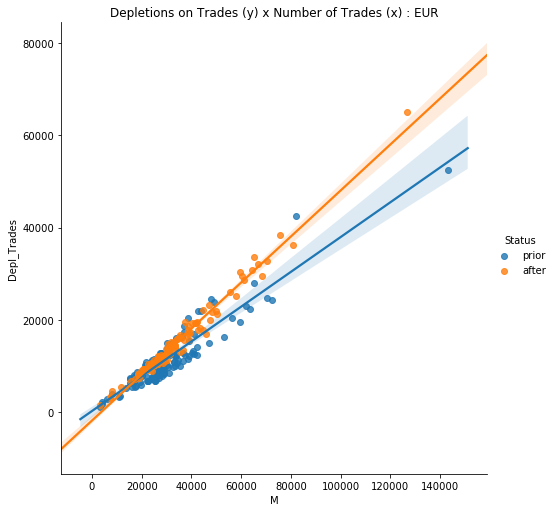

In [59]:
cme.regr_plot(ABSDEPL_STATS_TS, 'M', 'Depl_Trades',\
    'Depletions on Trades (y) x Number of Trades (x) : '+CURR)

In [60]:
cme.lin_reg(ABSDEPL_STATS_TS, ['M'], 'Depl_Cancel')

                            OLS Regression Results                            
Dep. Variable:            Depl_Cancel   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     399.0
Date:                Thu, 12 Sep 2019   Prob (F-statistic):           1.05e-53
Time:                        17:40:25   Log-Likelihood:                -2449.6
No. Observations:                 252   AIC:                             4903.
Df Residuals:                     250   BIC:                             4910.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1765.2868    548.510      3.218      0.0

/Users/marcoscscarreira/anaconda3/envs/CondaEnv36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [61]:
cme.lin_reg(ABSDEPL_STATS_TS, ['M'], 'Depl_Trades')

                            OLS Regression Results                            
Dep. Variable:            Depl_Trades   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     2376.
Date:                Thu, 12 Sep 2019   Prob (F-statistic):          1.13e-129
Time:                        17:40:25   Log-Likelihood:                -2317.1
No. Observations:                 252   AIC:                             4638.
Df Residuals:                     250   BIC:                             4645.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -880.0296    324.188     -2.715      0.0

In [62]:
cme.lin_reg(PRIOR_ABSDEPL_STATS_TS, ['M'], 'Depl_Trades')

                            OLS Regression Results                            
Dep. Variable:            Depl_Trades   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     932.0
Date:                Thu, 12 Sep 2019   Prob (F-statistic):           5.22e-64
Time:                        17:40:25   Log-Likelihood:                -1312.8
No. Observations:                 143   AIC:                             2630.
Df Residuals:                     141   BIC:                             2636.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        238.3896    415.711      0.573      0.5

In [63]:
cme.lin_reg(AFTER_ABSDEPL_STATS_TS, ['M'], 'Depl_Trades')

                            OLS Regression Results                            
Dep. Variable:            Depl_Trades   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     4626.
Date:                Thu, 12 Sep 2019   Prob (F-statistic):           7.00e-90
Time:                        17:40:25   Log-Likelihood:                -935.56
No. Observations:                 109   AIC:                             1875.
Df Residuals:                     107   BIC:                             1881.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1825.6996    281.834     -6.478      0.0

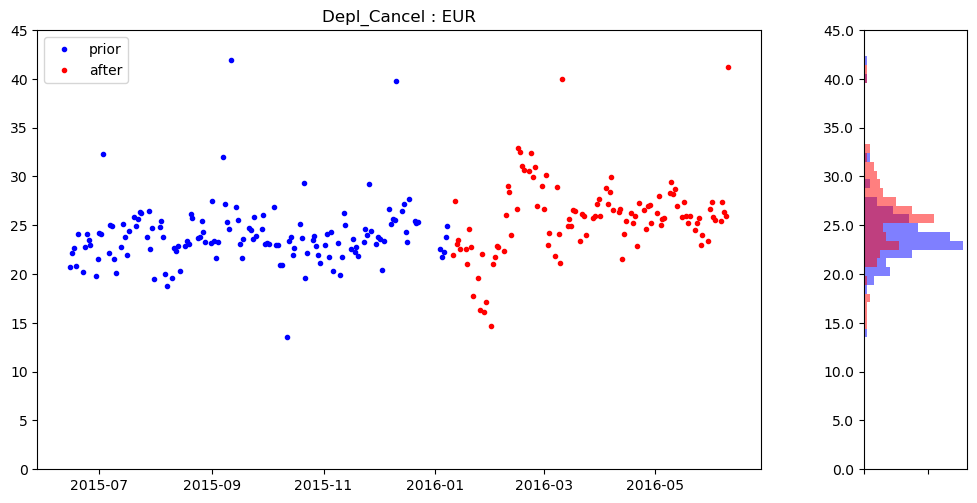

In [64]:
cme.time_series_hist_plot(DEPL_STATS_TS, 'Depl_Cancel',\
    'Depl_Cancel : '+CURR, 0, 45, 50)

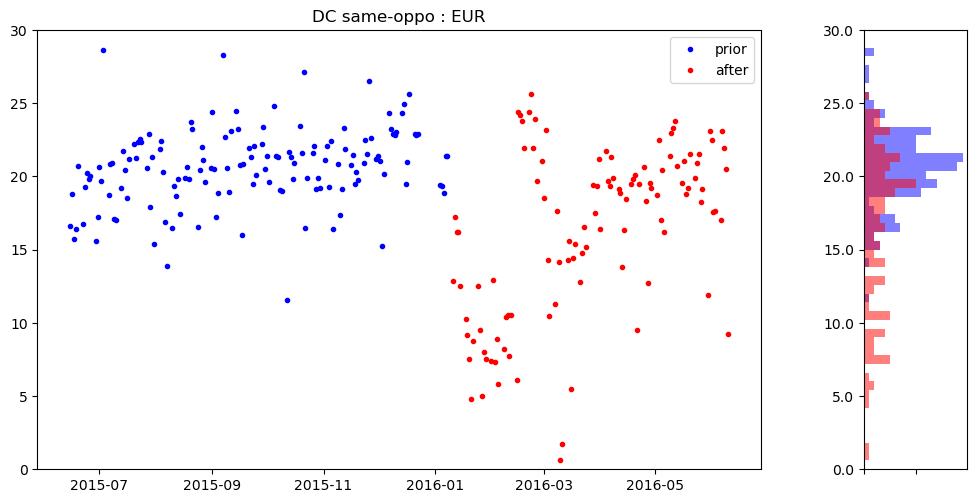

In [65]:
cme.time_series_hist_plot(DEPL_STATS_TS, 'DC same-oppo',\
    'DC same-oppo : '+CURR, 0, 30, 50)

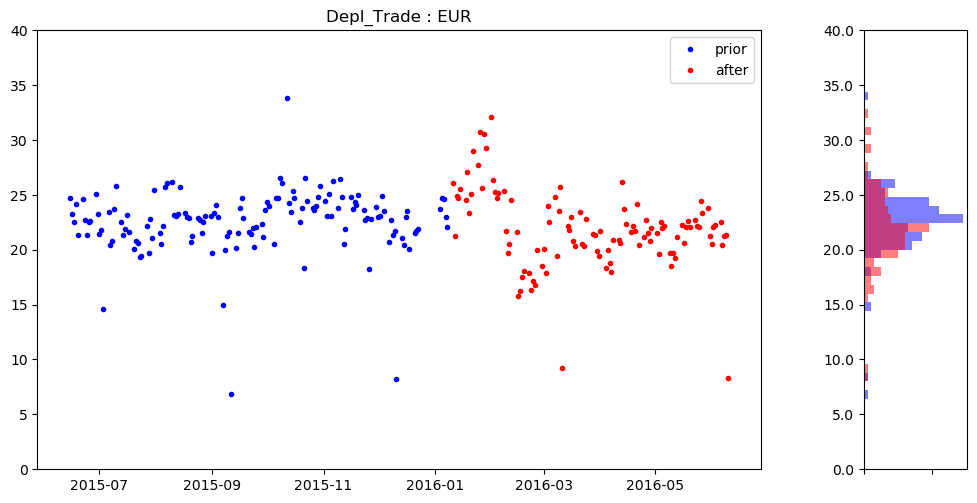

In [66]:
cme.time_series_hist_plot(DEPL_STATS_TS, 'Depl_Trade',\
    'Depl_Trade : '+CURR, 0, 40, 50)

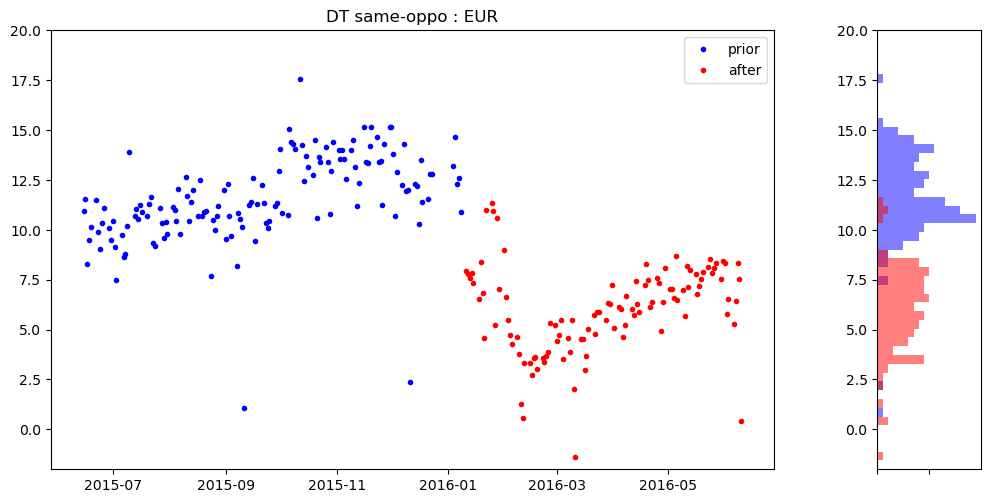

In [67]:
cme.time_series_hist_plot(DEPL_STATS_TS, 'DT same-oppo',\
    'DT same-oppo : '+CURR, -2, 20, 50)

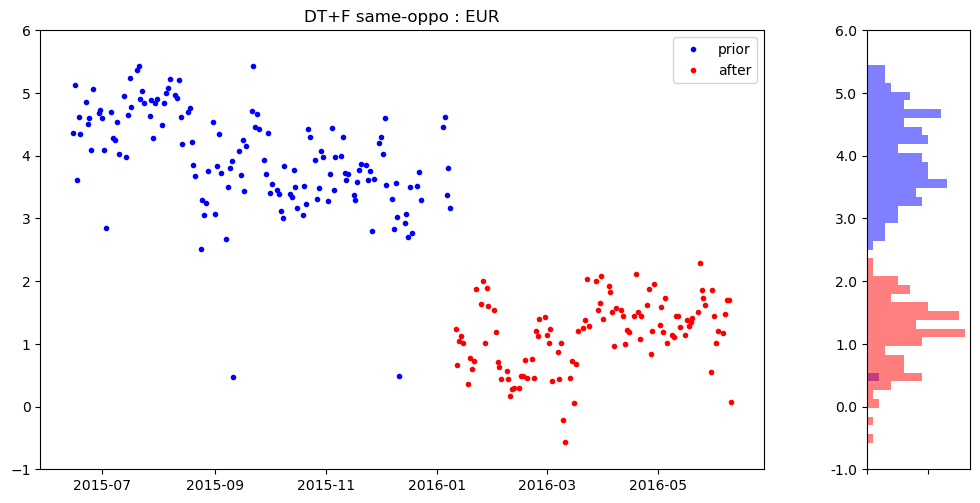

In [68]:
cme.time_series_hist_plot(DEPL_STATS_TS, 'DT+F same-oppo',\
    'DT+F same-oppo : '+CURR, -1, 6, 50)

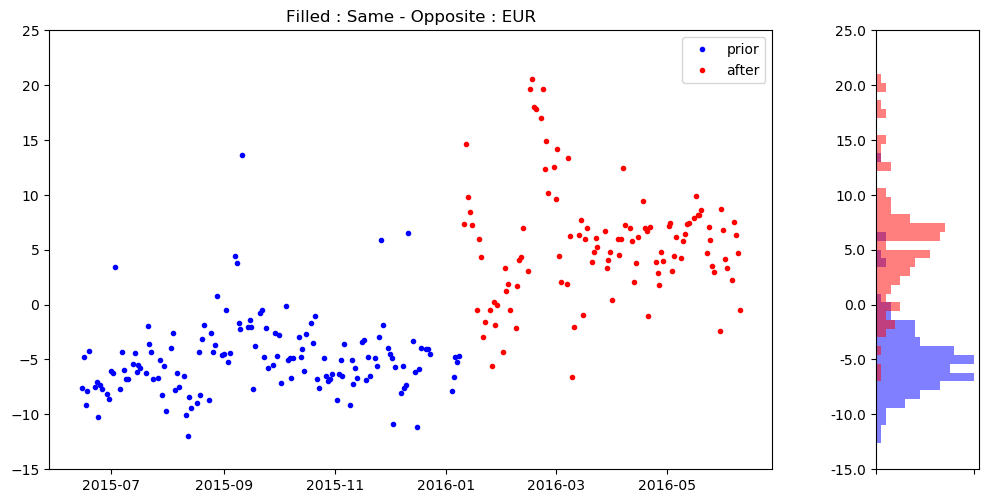

In [69]:
cme.time_series_hist_plot(DEPL_STATS_TS, 'Fill same-oppo',\
    'Filled : Same - Opposite : '+CURR, -15, 25, 50)

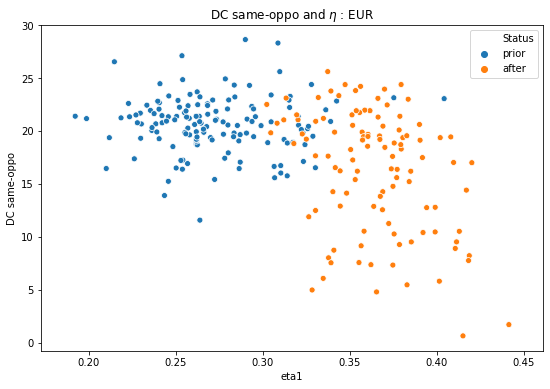

In [70]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='eta1', y='DC same-oppo', hue='Status',\
           data=DEPL_STATS_TS);
plt.title('DC same-oppo and $\eta$ : '+CURR);

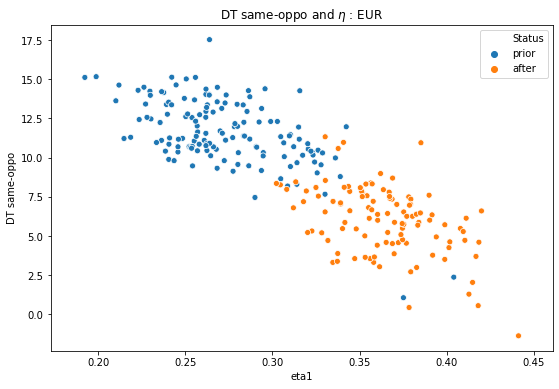

In [71]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='eta1', y='DT same-oppo', hue='Status',\
           data=DEPL_STATS_TS);
plt.title('DT same-oppo and $\eta$ : '+CURR);

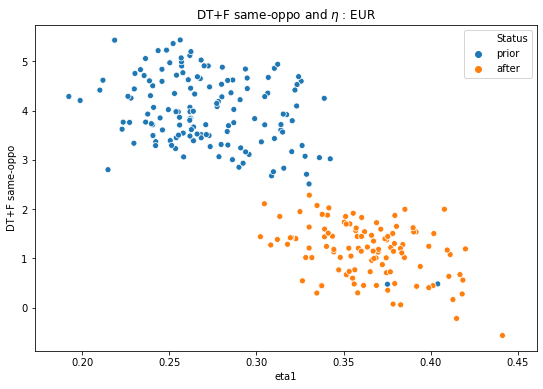

In [72]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='eta1', y='DT+F same-oppo', hue='Status',\
           data=DEPL_STATS_TS);
plt.title('DT+F same-oppo and $\eta$ : '+CURR);

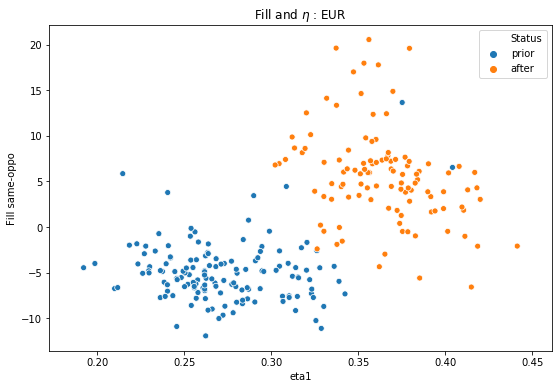

In [73]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='eta1', y='Fill same-oppo', hue='Status',\
           data=DEPL_STATS_TS);
plt.title('Fill and $\eta$ : '+CURR);

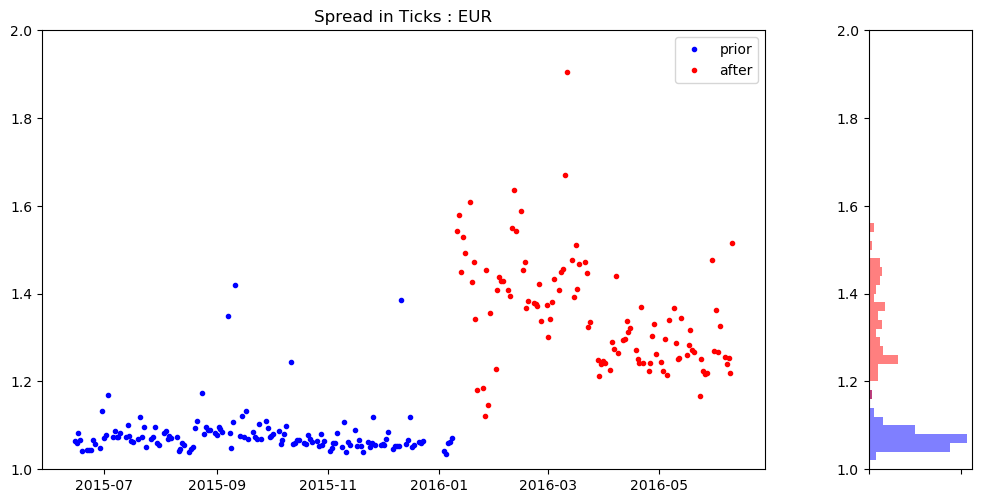

In [74]:
cme.time_series_hist_plot(OB_UZ_STATS, 'twspr1',\
    'Spread in Ticks : '+CURR, 1, 2, 50)

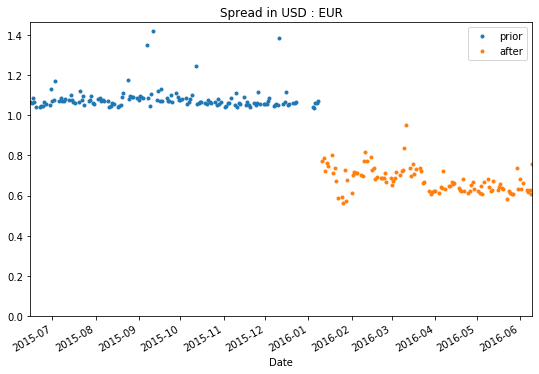

In [75]:
cme.twspr_plot_USD(OB_UZ_STATS, CURR)

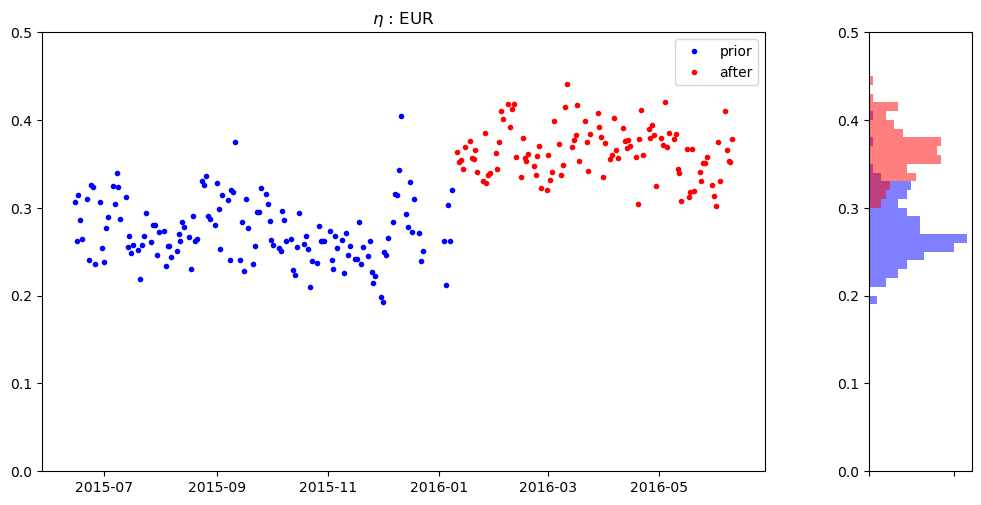

In [76]:
cme.time_series_hist_plot(OB_UZ_STATS, 'eta1',\
    '$\eta$ : '+CURR, 0, 0.5, 50)

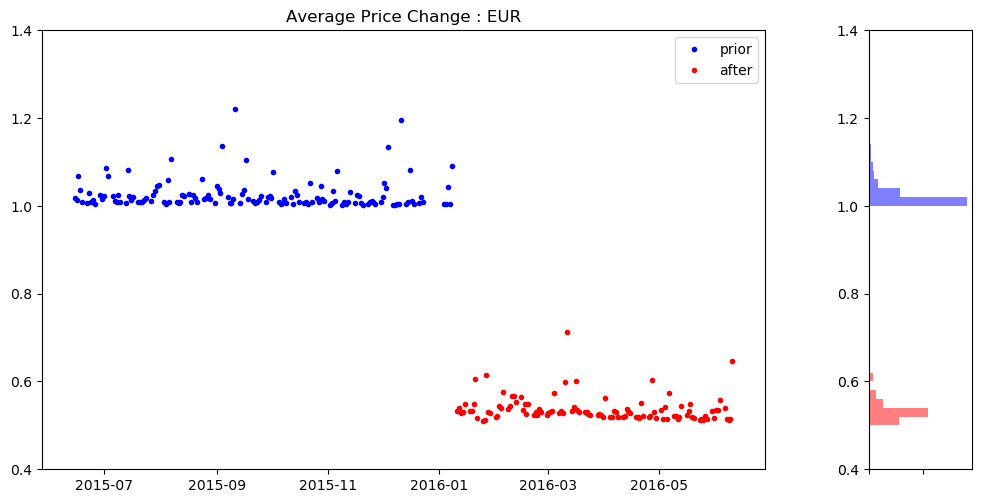

In [77]:
cme.time_series_hist_plot(OB_UZ_STATS, 'chgavg',\
    'Average Price Change : '+CURR, 0.4, 1.4, 50)

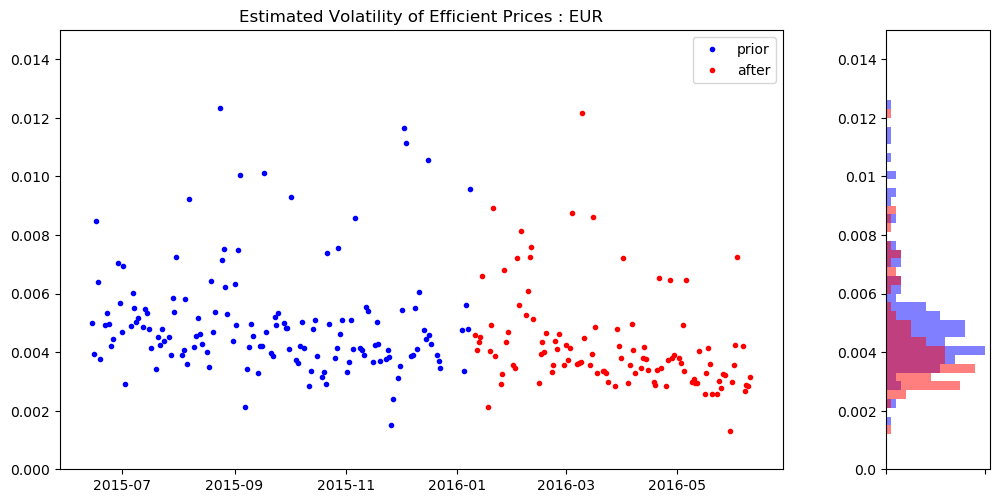

In [78]:
cme.time_series_hist_plot(OB_UZ_STATS, 'rvxe',\
    'Estimated Volatility of Efficient Prices : '+CURR, 0, 0.015, 50)

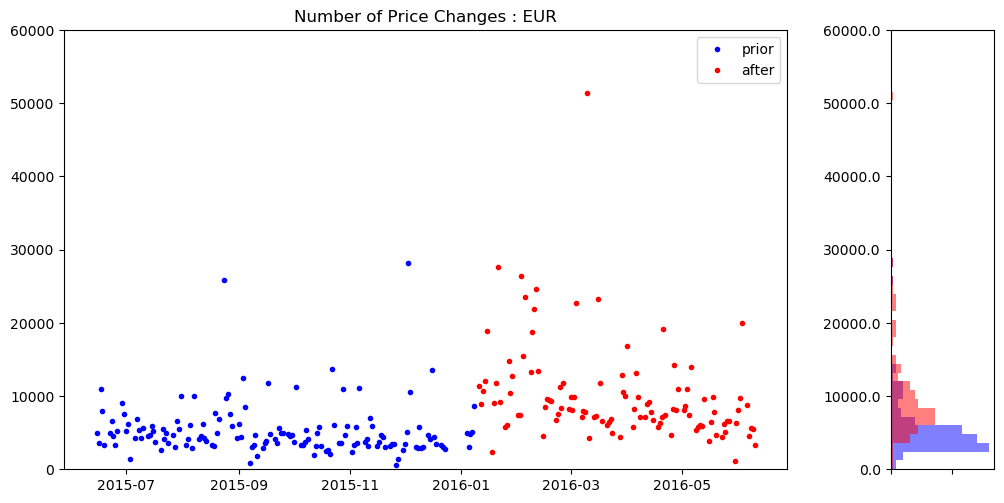

In [79]:
cme.time_series_hist_plot(OB_UZ_STATS, 'ndfpr',\
    'Number of Price Changes : '+CURR, 0, 60000, 50)

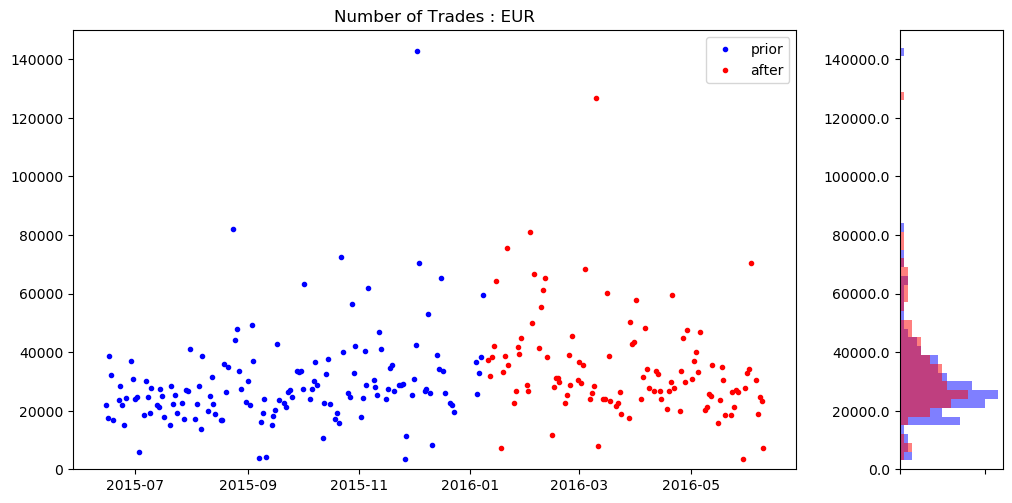

In [80]:
cme.time_series_hist_plot(OB_UZ_STATS, 'M',\
    'Number of Trades : '+CURR, 0, 150000, 50)

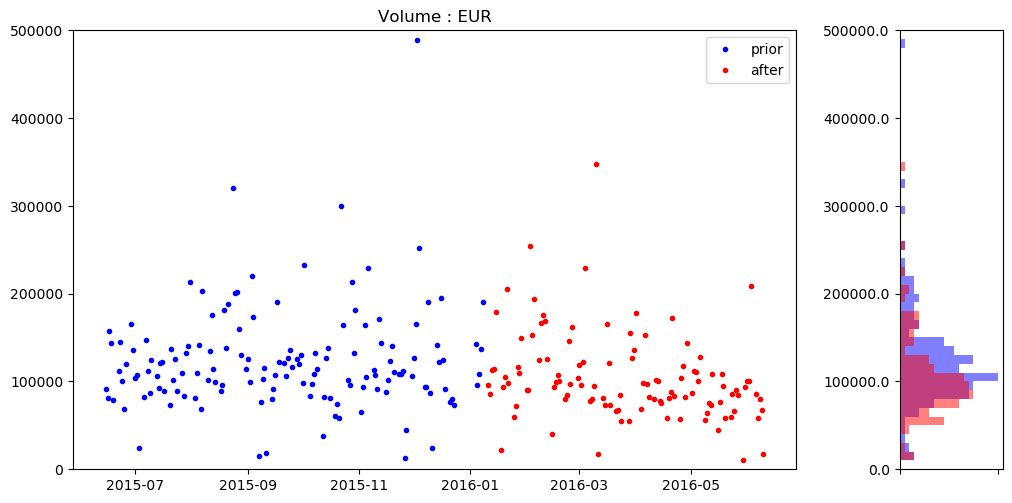

In [81]:
cme.time_series_hist_plot(OB_UZ_STATS, 'Volume',\
    'Volume : '+CURR, 0, 500000, 50)

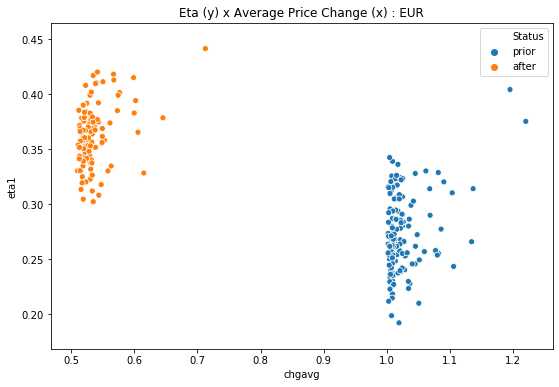

In [82]:
cme.scatter_plot(OB_UZ_STATS, 'chgavg', 'eta1',\
    'Eta (y) x Average Price Change (x) : '+CURR)

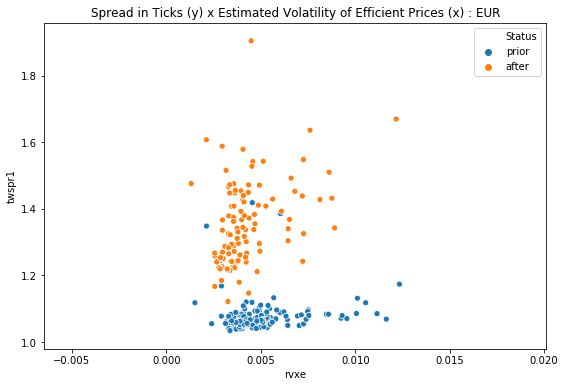

In [83]:
cme.scatter_plot(OB_UZ_STATS, 'rvxe', 'twspr1',\
    'Spread in Ticks (y) x Estimated Volatility of Efficient Prices (x) : '+CURR)

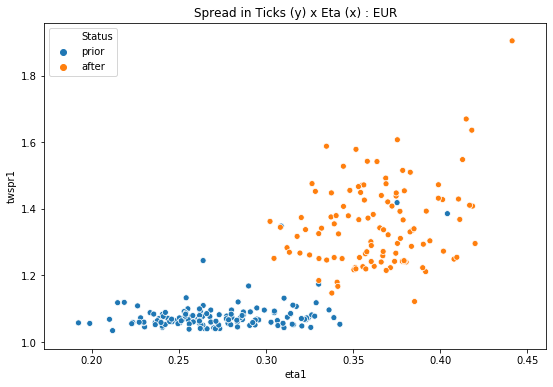

In [84]:
cme.scatter_plot(OB_UZ_STATS, 'eta1', 'twspr1',\
    'Spread in Ticks (y) x Eta (x) : '+CURR)

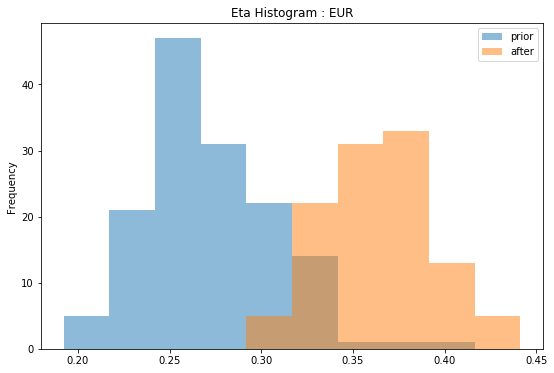

In [85]:
cme.time_series_hist(OB_UZ_STATS, 'eta1',\
    'Eta Histogram : '+CURR)

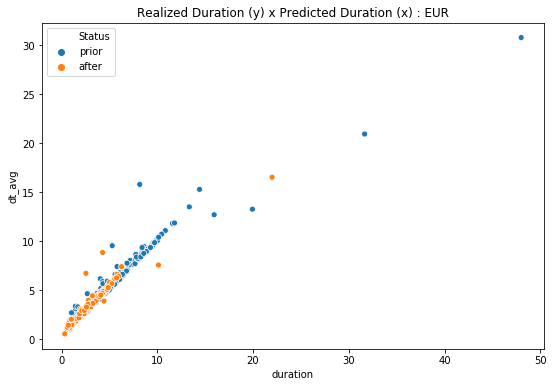

In [86]:
cme.scatter_plot(OB_UZ_STATS, 'duration', 'dt_avg',\
    'Realized Duration (y) x Predicted Duration (x) : '+CURR)

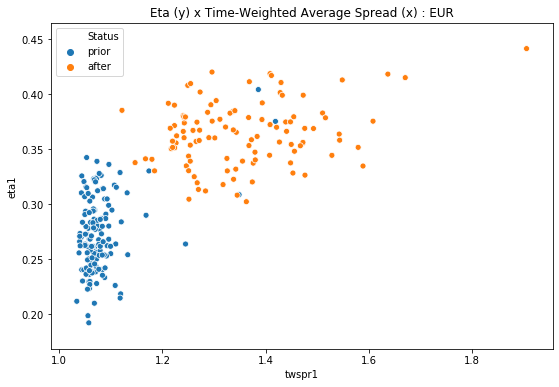

In [87]:
cme.scatter_plot(OB_UZ_STATS, 'twspr1', 'eta1',\
    'Eta (y) x Time-Weighted Average Spread (x) : '+CURR)

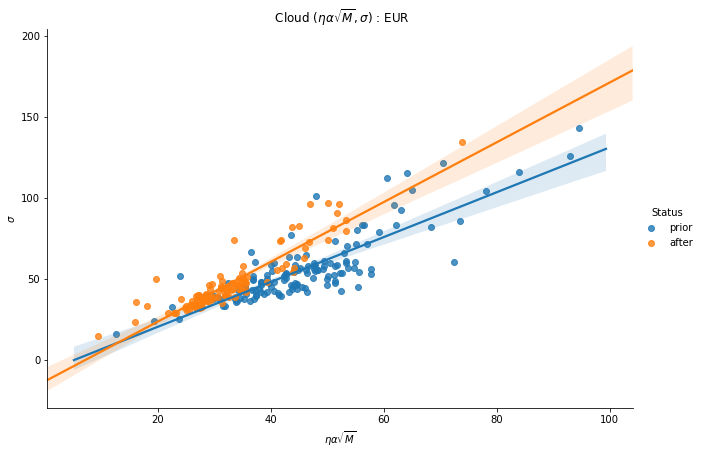

In [88]:
cme.cloud1(OB_UZ_STATS, CURR)

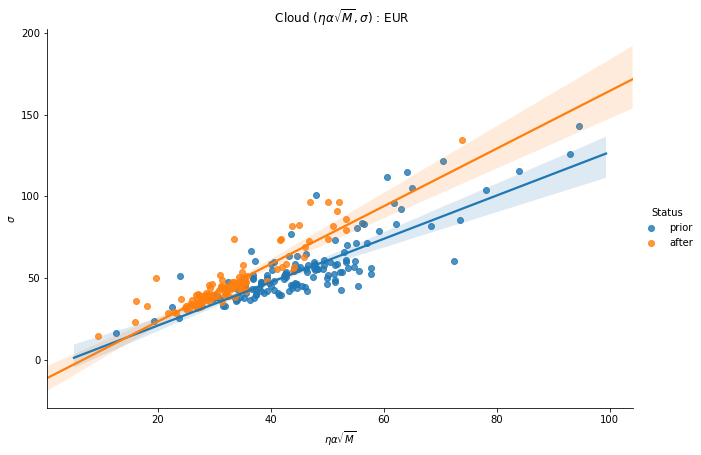

In [89]:
cme.cloud1(OB_UZ_STATS, CURR, True)

In [90]:
cme.lin_reg(PRIOR_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')

                            OLS Regression Results                            
Dep. Variable:                  sigma   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     187.0
Date:                Thu, 12 Sep 2019   Prob (F-statistic):           2.93e-40
Time:                        17:40:45   Log-Likelihood:                -541.89
No. Observations:                 143   AIC:                             1090.
Df Residuals:                     140   BIC:                             1099.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -12.1276      3.82

In [91]:
cme.lin_reg_rob(PRIOR_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')

                    Robust linear Model Regression Results                    
Dep. Variable:                  sigma   No. Observations:                  143
Model:                            RLM   Df Residuals:                      140
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 12 Sep 2019                                         
Time:                        17:40:45                                         
No. Iterations:                    21                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -10.0161      3.13

In [92]:
cme.lin_reg(AFTER_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')

                            OLS Regression Results                            
Dep. Variable:                  sigma   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     383.7
Date:                Thu, 12 Sep 2019   Prob (F-statistic):           2.86e-49
Time:                        17:40:45   Log-Likelihood:                -356.84
No. Observations:                 109   AIC:                             719.7
Df Residuals:                     106   BIC:                             727.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -15.2391      2.35

In [93]:
cme.lin_reg_rob(AFTER_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')

                    Robust linear Model Regression Results                    
Dep. Variable:                  sigma   No. Observations:                  109
Model:                            RLM   Df Residuals:                      106
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 12 Sep 2019                                         
Time:                        17:40:45                                         
No. Iterations:                    35                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -13.4553      1.38

In [94]:
OB_UZ_STATS['p1*eta*alpha*sqrt(M)'] = np.where(OB_UZ_STATS['Status']=='prior',\
    cme.lin_reg_params(PRIOR_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')['eta*alpha*sqrt(M)'],\
    cme.lin_reg_params(AFTER_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')['eta*alpha*sqrt(M)'])\
    *OB_UZ_STATS['eta*alpha*sqrt(M)']
OB_UZ_STATS['sigma-p2*S*sqrt(M)'] = OB_UZ_STATS['sigma']-\
    np.where(OB_UZ_STATS['Status']=='prior',\
    cme.lin_reg_params(PRIOR_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')['S*sqrt(M)'],\
    cme.lin_reg_params(AFTER_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')['S*sqrt(M)'])*\
    OB_UZ_STATS['S*sqrt(M)']

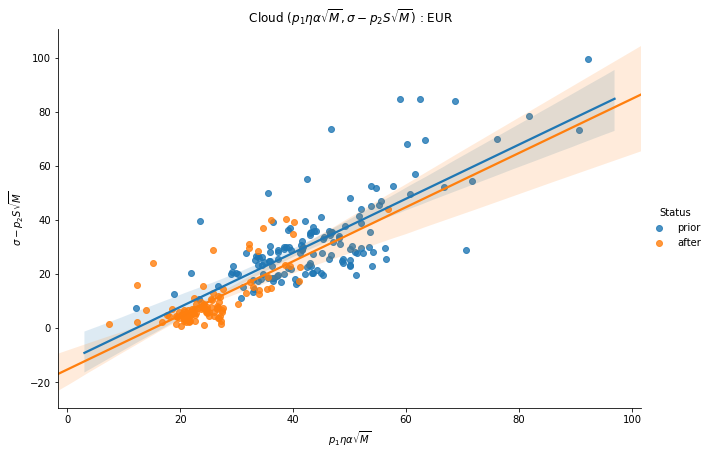

In [95]:
cme.cloud2(OB_UZ_STATS, CURR)

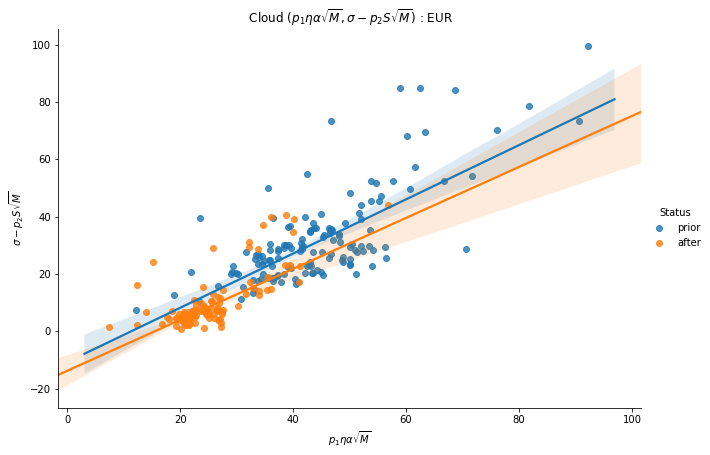

In [96]:
cme.cloud2(OB_UZ_STATS, CURR, True)

In [97]:
cme.lin_reg(OB_UZ_STATS[OB_UZ_STATS['Status']=='prior'], ['p1*eta*alpha*sqrt(M)'], 'sigma-p2*S*sqrt(M)')

                            OLS Regression Results                            
Dep. Variable:     sigma-p2*S*sqrt(M)   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     182.8
Date:                Thu, 12 Sep 2019   Prob (F-statistic):           3.14e-27
Time:                        17:40:56   Log-Likelihood:                -541.89
No. Observations:                 143   AIC:                             1088.
Df Residuals:                     141   BIC:                             1094.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -12.1276 

In [98]:
cme.lin_reg_rob(OB_UZ_STATS[OB_UZ_STATS['Status']=='prior'], ['p1*eta*alpha*sqrt(M)'], 'sigma-p2*S*sqrt(M)')

                    Robust linear Model Regression Results                    
Dep. Variable:     sigma-p2*S*sqrt(M)   No. Observations:                  143
Model:                            RLM   Df Residuals:                      141
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 12 Sep 2019                                         
Time:                        17:40:56                                         
No. Iterations:                    17                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -10.7292 

In [99]:
cme.lin_reg(OB_UZ_STATS[OB_UZ_STATS['Status']=='after'], ['p1*eta*alpha*sqrt(M)'], 'sigma-p2*S*sqrt(M)')

                            OLS Regression Results                            
Dep. Variable:     sigma-p2*S*sqrt(M)   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     128.6
Date:                Thu, 12 Sep 2019   Prob (F-statistic):           4.72e-20
Time:                        17:40:56   Log-Likelihood:                -356.84
No. Observations:                 109   AIC:                             717.7
Df Residuals:                     107   BIC:                             723.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -15.2391 

In [100]:
cme.lin_reg_rob(OB_UZ_STATS[OB_UZ_STATS['Status']=='after'], ['p1*eta*alpha*sqrt(M)'], 'sigma-p2*S*sqrt(M)')

                    Robust linear Model Regression Results                    
Dep. Variable:     sigma-p2*S*sqrt(M)   No. Observations:                  109
Model:                            RLM   Df Residuals:                      107
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 12 Sep 2019                                         
Time:                        17:40:56                                         
No. Iterations:                    24                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -13.7862 

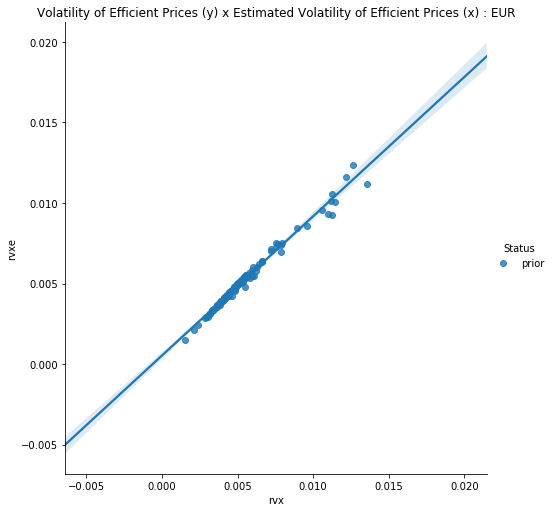

In [101]:
cme.regr_plot(PRIOR_OB_UZ_STATS, 'rvx', 'rvxe',\
    'Volatility of Efficient Prices (y) x Estimated Volatility of Efficient Prices (x) : '+CURR)

In [102]:
cme.lin_reg(PRIOR_OB_UZ_STATS, 'rvx', 'rvxe', True)

                            OLS Regression Results                            
Dep. Variable:                   rvxe   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.851e+04
Date:                Thu, 12 Sep 2019   Prob (F-statistic):          1.81e-151
Time:                        17:40:56   Log-Likelihood:                 308.95
No. Observations:                 143   AIC:                            -613.9
Df Residuals:                     141   BIC:                            -608.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3986      0.036    -10.934      0.0

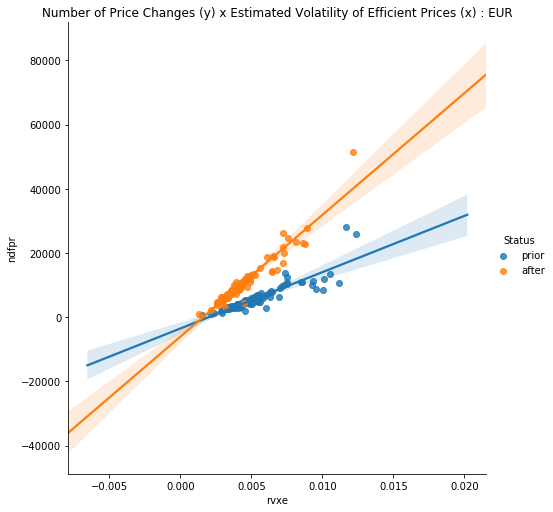

In [103]:
cme.regr_plot(OB_UZ_STATS, 'rvxe', 'ndfpr',\
    'Number of Price Changes (y) x Estimated Volatility of Efficient Prices (x) : '+CURR)

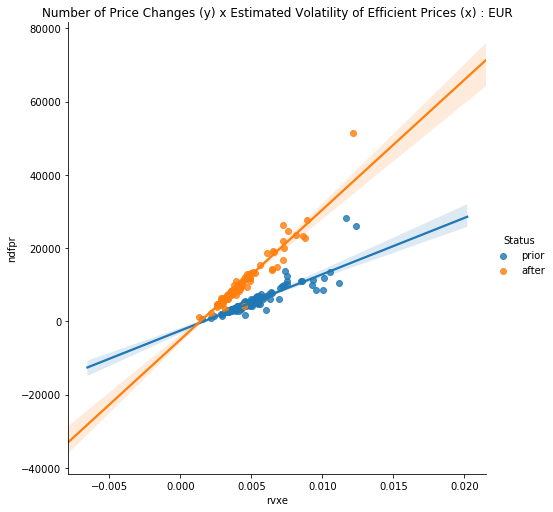

In [104]:
cme.regr_plot(OB_UZ_STATS, 'rvxe', 'ndfpr',\
    'Number of Price Changes (y) x Estimated Volatility of Efficient Prices (x) : '+CURR, True)

In [105]:
cme.lin_reg(PRIOR_OB_UZ_STATS, 'rvxe', 'ndfpr', True)

                            OLS Regression Results                            
Dep. Variable:                  ndfpr   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     1103.
Date:                Thu, 12 Sep 2019   Prob (F-statistic):           1.52e-68
Time:                        17:41:04   Log-Likelihood:                 43.928
No. Observations:                 143   AIC:                            -83.86
Df Residuals:                     141   BIC:                            -77.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.7255      0.250     66.825      0.0

In [106]:
cme.lin_reg_rob(PRIOR_OB_UZ_STATS, 'rvxe', 'ndfpr', True)

                    Robust linear Model Regression Results                    
Dep. Variable:                  ndfpr   No. Observations:                  143
Model:                            RLM   Df Residuals:                      141
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 12 Sep 2019                                         
Time:                        17:41:04                                         
No. Iterations:                    32                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8768      0.181     93.414      0.0

In [107]:
cme.lin_reg(AFTER_OB_UZ_STATS, 'rvxe', 'ndfpr', True)

                            OLS Regression Results                            
Dep. Variable:                  ndfpr   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     1187.
Date:                Thu, 12 Sep 2019   Prob (F-statistic):           9.53e-60
Time:                        17:41:05   Log-Likelihood:                 50.105
No. Observations:                 109   AIC:                            -96.21
Df Residuals:                     107   BIC:                            -90.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.4501      0.244     71.601      0.0

In [108]:
cme.lin_reg_rob(AFTER_OB_UZ_STATS, 'rvxe', 'ndfpr', True)

                    Robust linear Model Regression Results                    
Dep. Variable:                  ndfpr   No. Observations:                  109
Model:                            RLM   Df Residuals:                      107
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 12 Sep 2019                                         
Time:                        17:41:05                                         
No. Iterations:                    19                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.3846      0.151    114.780      0.0

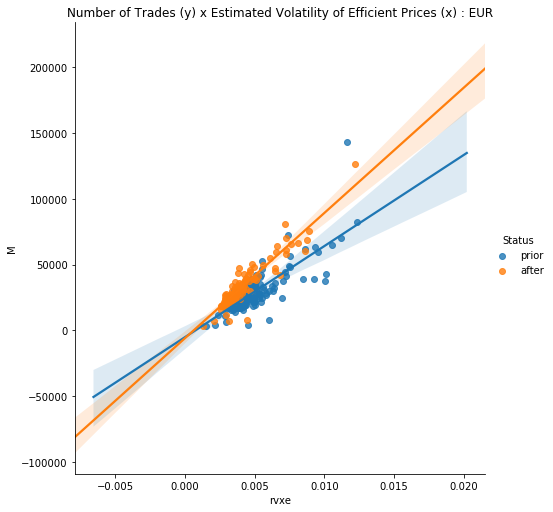

In [109]:
cme.regr_plot(OB_UZ_STATS, 'rvxe', 'M',\
    'Number of Trades (y) x Estimated Volatility of Efficient Prices (x) : '+CURR)

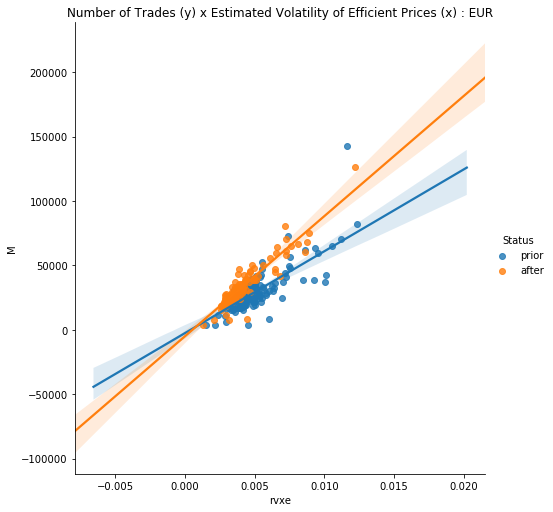

In [110]:
cme.regr_plot(OB_UZ_STATS, 'rvxe', 'M',\
    'Number of Trades (y) x Estimated Volatility of Efficient Prices (x) : '+CURR, True)

In [111]:
cme.lin_reg(PRIOR_OB_UZ_STATS, 'rvxe', 'M', True)

                            OLS Regression Results                            
Dep. Variable:                      M   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     188.9
Date:                Thu, 12 Sep 2019   Prob (F-statistic):           8.26e-28
Time:                        17:41:09   Log-Likelihood:                -44.632
No. Observations:                 143   AIC:                             93.26
Df Residuals:                     141   BIC:                             99.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.5558      0.465     35.608      0.0

In [112]:
cme.lin_reg_rob(PRIOR_OB_UZ_STATS, 'rvxe', 'M', True)

                    Robust linear Model Regression Results                    
Dep. Variable:                      M   No. Observations:                  143
Model:                            RLM   Df Residuals:                      141
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 12 Sep 2019                                         
Time:                        17:41:09                                         
No. Iterations:                    14                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.1332      0.363     44.419      0.0

In [113]:
cme.lin_reg(AFTER_OB_UZ_STATS, 'rvxe', 'M', True)

                            OLS Regression Results                            
Dep. Variable:                      M   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     291.8
Date:                Thu, 12 Sep 2019   Prob (F-statistic):           2.43e-32
Time:                        17:41:09   Log-Likelihood:                -7.2746
No. Observations:                 109   AIC:                             18.55
Df Residuals:                     107   BIC:                             23.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.3683      0.413     42.097      0.0

In [114]:
cme.lin_reg_rob(AFTER_OB_UZ_STATS, 'rvxe', 'M', True)

                    Robust linear Model Regression Results                    
Dep. Variable:                      M   No. Observations:                  109
Model:                            RLM   Df Residuals:                      107
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 12 Sep 2019                                         
Time:                        17:41:09                                         
No. Iterations:                    16                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8512      0.239     70.596      0.0

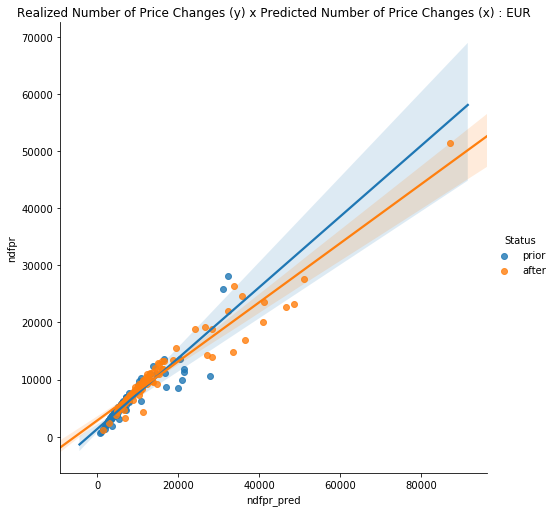

In [115]:
cme.regr_plot(OB_UZ_STATS, 'ndfpr_pred', 'ndfpr',\
    'Realized Number of Price Changes (y) x Predicted Number of Price Changes (x) : '+CURR)

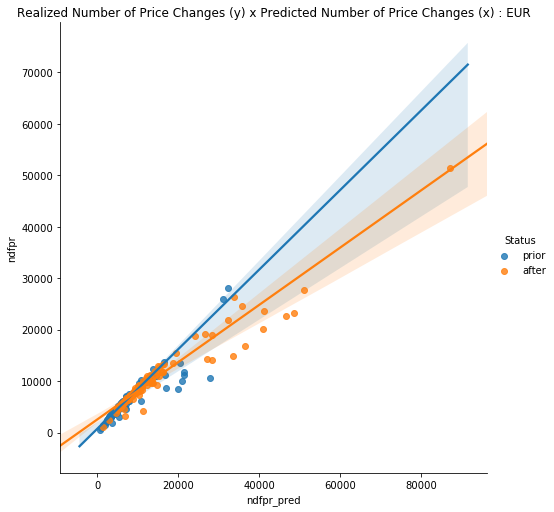

In [116]:
cme.regr_plot(OB_UZ_STATS, 'ndfpr_pred', 'ndfpr',\
    'Realized Number of Price Changes (y) x Predicted Number of Price Changes (x) : '+CURR, True)

In [117]:
cme.lin_reg(PRIOR_OB_UZ_STATS, 'ndfpr_pred', 'ndfpr')

                            OLS Regression Results                            
Dep. Variable:                  ndfpr   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     805.5
Date:                Thu, 12 Sep 2019   Prob (F-statistic):           3.67e-60
Time:                        17:41:21   Log-Likelihood:                -1237.6
No. Observations:                 143   AIC:                             2479.
Df Residuals:                     141   BIC:                             2485.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1366.3251    181.427      7.531      0.0

In [118]:
cme.lin_reg_rob(PRIOR_OB_UZ_STATS, 'ndfpr_pred', 'ndfpr')

                    Robust linear Model Regression Results                    
Dep. Variable:                  ndfpr   No. Observations:                  143
Model:                            RLM   Df Residuals:                      141
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 12 Sep 2019                                         
Time:                        17:41:21                                         
No. Iterations:                    45                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        727.8902     47.904     15.195      0.0

In [119]:
cme.lin_reg(AFTER_OB_UZ_STATS, 'ndfpr_pred', 'ndfpr')

                            OLS Regression Results                            
Dep. Variable:                  ndfpr   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     1448.
Date:                Thu, 12 Sep 2019   Prob (F-statistic):           5.13e-64
Time:                        17:41:21   Log-Likelihood:                -966.45
No. Observations:                 109   AIC:                             1937.
Df Residuals:                     107   BIC:                             1942.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2847.4496    251.718     11.312      0.0

In [120]:
cme.lin_reg_rob(AFTER_OB_UZ_STATS, 'ndfpr_pred', 'ndfpr')

                    Robust linear Model Regression Results                    
Dep. Variable:                  ndfpr   No. Observations:                  109
Model:                            RLM   Df Residuals:                      107
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 12 Sep 2019                                         
Time:                        17:41:21                                         
No. Iterations:                    12                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2540.7052    151.027     16.823      0.0

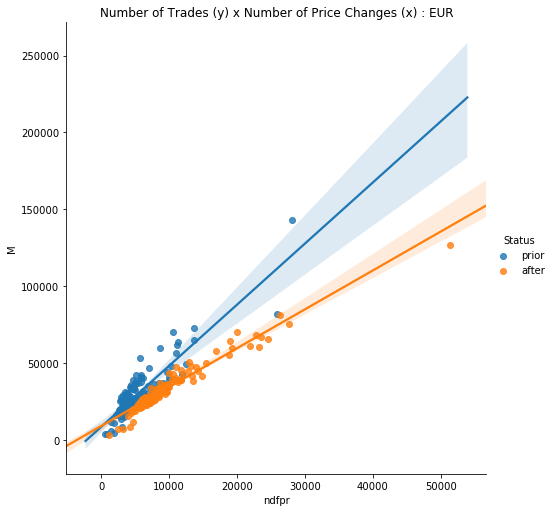

In [121]:
cme.regr_plot(OB_UZ_STATS, 'ndfpr', 'M',\
    'Number of Trades (y) x Number of Price Changes (x) : '+CURR)

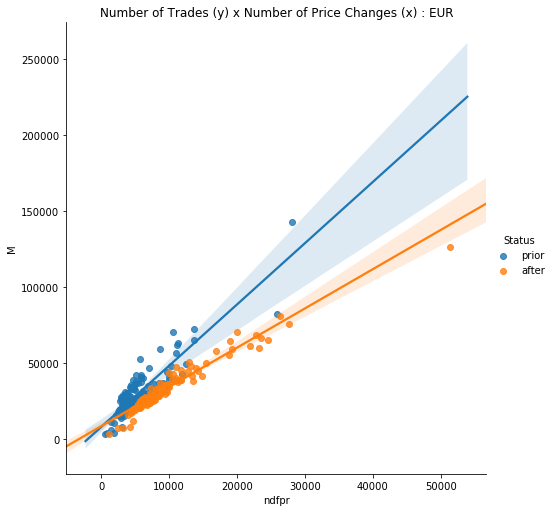

In [122]:
cme.regr_plot(OB_UZ_STATS, 'ndfpr', 'M',\
    'Number of Trades (y) x Number of Price Changes (x) : '+CURR, True)

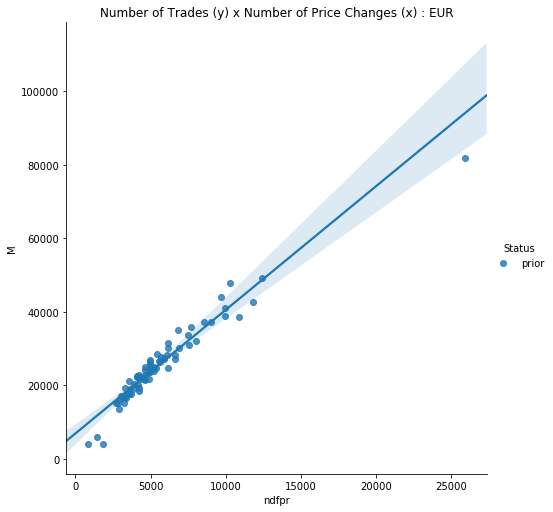

In [123]:
cme.regr_plot(OB_UZ_STATS.loc[:'2015-09-26'], 'ndfpr', 'M',\
    'Number of Trades (y) x Number of Price Changes (x) : '+CURR, True)

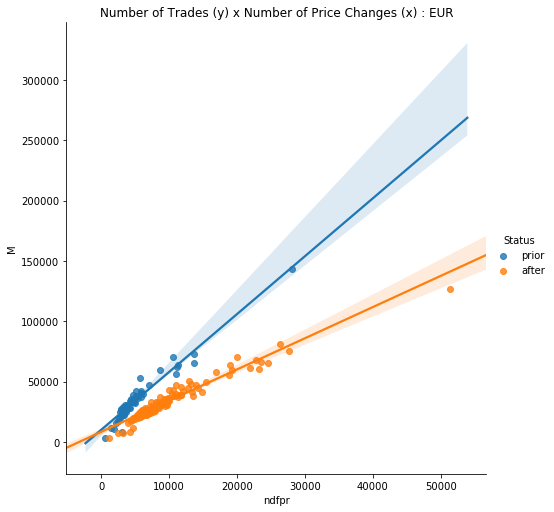

In [124]:
cme.regr_plot(OB_UZ_STATS.loc['2015-09-26':], 'ndfpr', 'M',\
    'Number of Trades (y) x Number of Price Changes (x) : '+CURR, True)

In [125]:
cme.lin_reg(PRIOR_OB_UZ_STATS.loc[:'2015-09-26'], 'ndfpr', 'M')

                            OLS Regression Results                            
Dep. Variable:                      M   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     1095.
Date:                Thu, 12 Sep 2019   Prob (F-statistic):           1.07e-45
Time:                        17:41:35   Log-Likelihood:                -700.22
No. Observations:                  75   AIC:                             1404.
Df Residuals:                      73   BIC:                             1409.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7590.6126    631.093     12.028      0.0

In [126]:
cme.lin_reg(PRIOR_OB_UZ_STATS.loc['2015-09-26':], 'ndfpr', 'M')

                            OLS Regression Results                            
Dep. Variable:                      M   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     1088.
Date:                Thu, 12 Sep 2019   Prob (F-statistic):           9.91e-43
Time:                        17:41:35   Log-Likelihood:                -669.87
No. Observations:                  68   AIC:                             1344.
Df Residuals:                      66   BIC:                             1348.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9968.5480    922.956     10.801      0.0

In [127]:
cme.lin_reg(PRIOR_OB_UZ_STATS, 'ndfpr', 'M')

                            OLS Regression Results                            
Dep. Variable:                      M   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     546.9
Date:                Thu, 12 Sep 2019   Prob (F-statistic):           2.25e-50
Time:                        17:41:35   Log-Likelihood:                -1474.0
No. Observations:                 143   AIC:                             2952.
Df Residuals:                     141   BIC:                             2958.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8523.6772   1088.390      7.831      0.0

In [128]:
cme.lin_reg_rob(PRIOR_OB_UZ_STATS, 'ndfpr', 'M')

                    Robust linear Model Regression Results                    
Dep. Variable:                      M   No. Observations:                  143
Model:                            RLM   Df Residuals:                      141
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 12 Sep 2019                                         
Time:                        17:41:35                                         
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8107.7176    992.405      8.170      0.0

In [129]:
cme.lin_reg(AFTER_OB_UZ_STATS, 'ndfpr', 'M')

                            OLS Regression Results                            
Dep. Variable:                      M   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     1755.
Date:                Thu, 12 Sep 2019   Prob (F-statistic):           3.41e-68
Time:                        17:41:35   Log-Likelihood:                -1061.0
No. Observations:                 109   AIC:                             2126.
Df Residuals:                     107   BIC:                             2131.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9026.7195    723.928     12.469      0.0

In [130]:
cme.lin_reg_rob(AFTER_OB_UZ_STATS, 'ndfpr', 'M')

                    Robust linear Model Regression Results                    
Dep. Variable:                      M   No. Observations:                  109
Model:                            RLM   Df Residuals:                      107
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 12 Sep 2019                                         
Time:                        17:41:35                                         
No. Iterations:                     6                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8567.0067    600.851     14.258      0.0

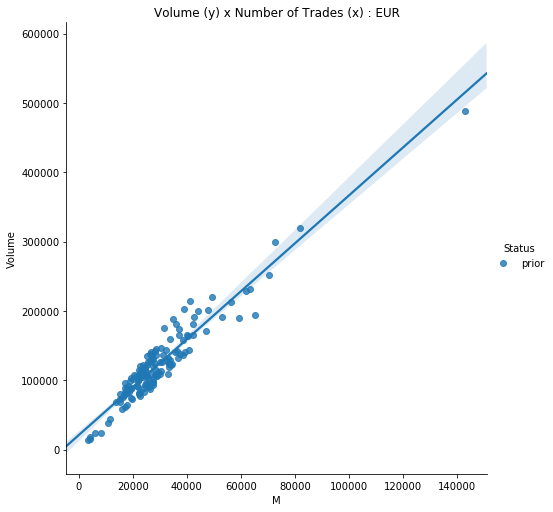

In [131]:
cme.regr_plot(PRIOR_OB_UZ_STATS, 'M', 'Volume',\
    'Volume (y) x Number of Trades (x) : '+CURR)

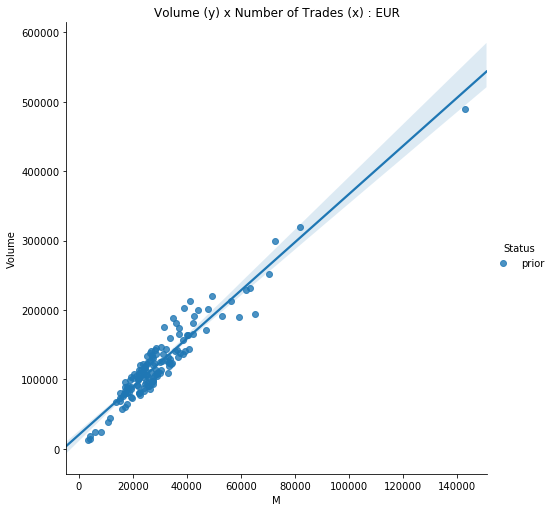

In [132]:
cme.regr_plot(PRIOR_OB_UZ_STATS, 'M', 'Volume',\
    'Volume (y) x Number of Trades (x) : '+CURR, True)

In [133]:
cme.lin_reg(PRIOR_OB_UZ_STATS, 'M', 'Volume')

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     1383.
Date:                Thu, 12 Sep 2019   Prob (F-statistic):           9.33e-75
Time:                        17:41:38   Log-Likelihood:                -1601.2
No. Observations:                 143   AIC:                             3206.
Df Residuals:                     141   BIC:                             3212.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.127e+04   3122.099      6.812      0.0

In [134]:
cme.lin_reg_rob(PRIOR_OB_UZ_STATS, 'M', 'Volume')

                    Robust linear Model Regression Results                    
Dep. Variable:                 Volume   No. Observations:                  143
Model:                            RLM   Df Residuals:                      141
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 12 Sep 2019                                         
Time:                        17:41:38                                         
No. Iterations:                     3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.056e+04   2976.103      6.908      0.0

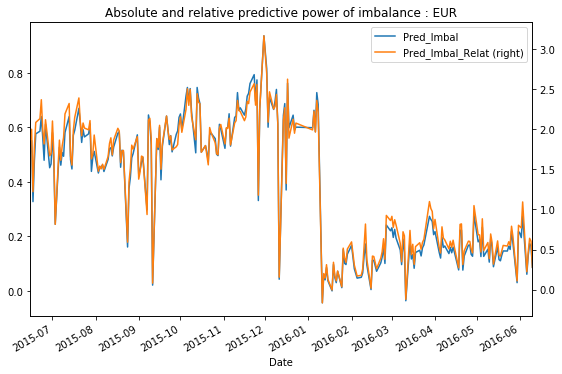

In [135]:
IMBAL_STATS_TS.drop(columns=['eta1']).plot(secondary_y=['Pred_Imbal_Relat'],\
    figsize=(9,6), title='Absolute and relative predictive power of imbalance : EUR');

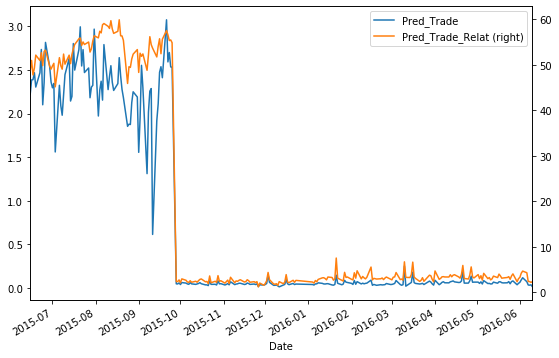

In [136]:
TRADE_STATS_TS.plot(secondary_y=['Pred_Trade_Relat'], figsize=(9,6));

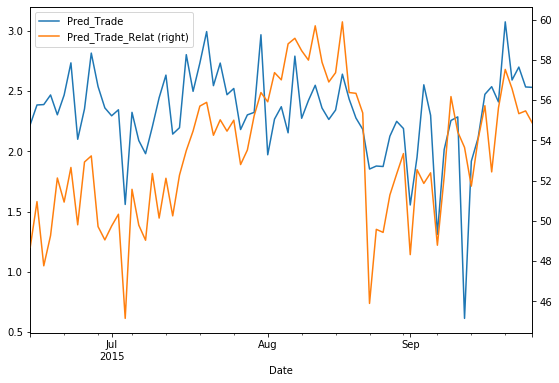

In [137]:
TRADE_STATS_TS.loc[:'2015-09-26'].plot(secondary_y=['Pred_Trade_Relat'], figsize=(9,6));

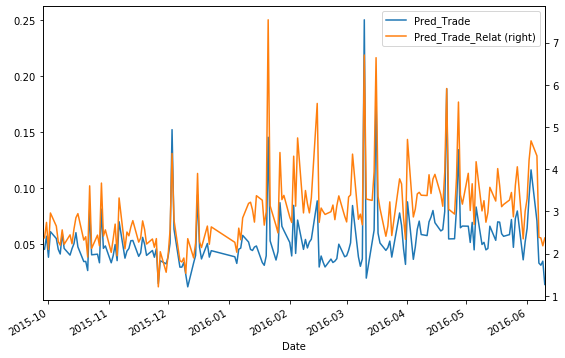

In [138]:
TRADE_STATS_TS.loc['2015-09-26':].plot(secondary_y=['Pred_Trade_Relat'], figsize=(9,6));

In [139]:
OB_UZ_STATS_SPREADS = cme.spread_stats(OB_UZ_STATS)

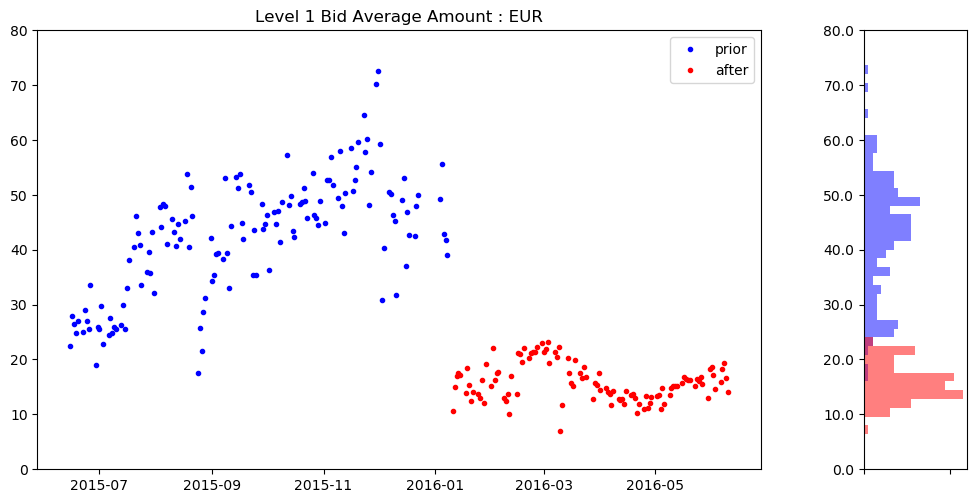

In [140]:
cme.time_series_hist_plot(OB_UZ_STATS_SPREADS, 'bid1qty',\
    'Level 1 Bid Average Amount : '+CURR, 0, 80, 50)

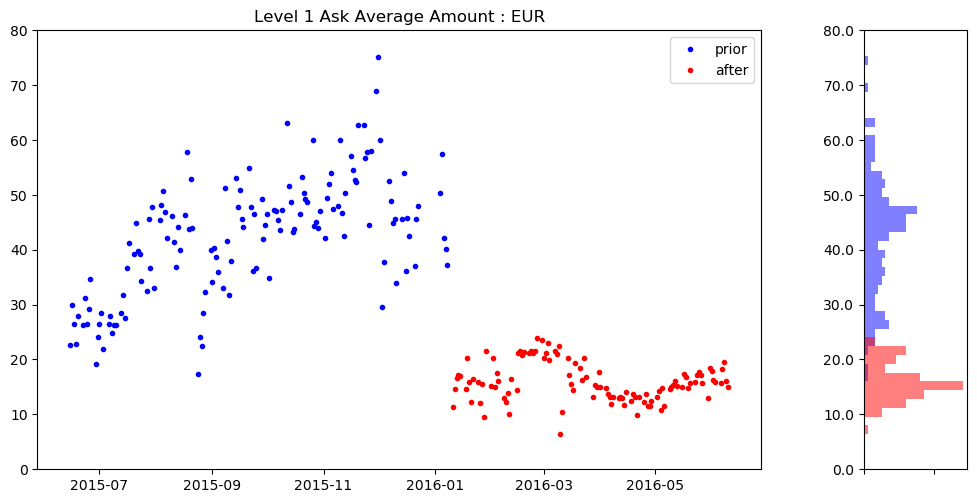

In [141]:
cme.time_series_hist_plot(OB_UZ_STATS_SPREADS, 'ask1qty',\
    'Level 1 Ask Average Amount : '+CURR, 0, 80, 50)

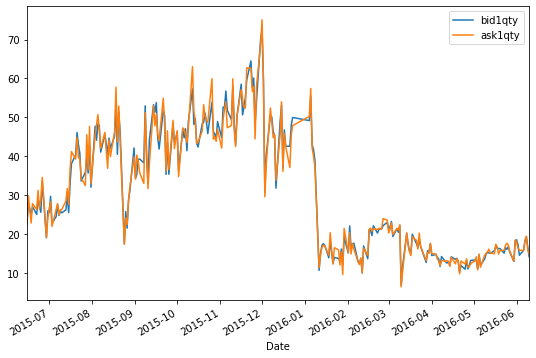

In [142]:
OB_UZ_STATS_SPREADS[['bid1qty', 'ask1qty']].plot(figsize=(9,6));

In [143]:
OB_UZ_STATS_SPREADS[OB_UZ_STATS_SPREADS['Status'] == 'prior'][['bid1qty', 'ask1qty']].mean()/\
    OB_UZ_STATS_SPREADS[OB_UZ_STATS_SPREADS['Status'] == 'after'][['bid1qty', 'ask1qty']].mean()

bid1qty    2.669760
ask1qty    2.656826
dtype: float64

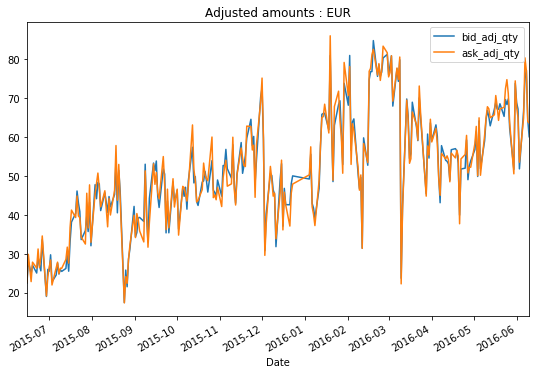

In [144]:
OB_UZ_STATS_SPREADS[['bid_adj_qty', 'ask_adj_qty']].plot(figsize=(9,6),\
    title='Adjusted amounts : '+CURR);

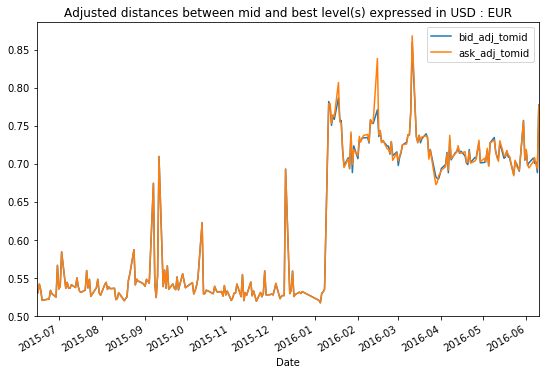

In [145]:
OB_UZ_STATS_SPREADS[['bid_adj_tomid', 'ask_adj_tomid']].plot(figsize=(9,6),\
    title='Adjusted distances between mid and best level(s) expressed in USD : '+CURR);

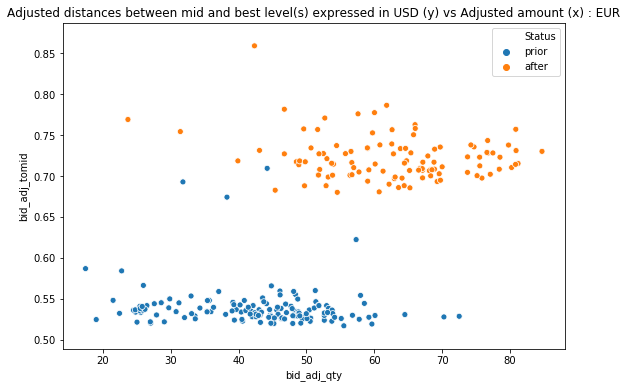

In [146]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='bid_adj_qty', y='bid_adj_tomid',\
                hue='Status', data=OB_UZ_STATS_SPREADS);
plt.title('Adjusted distances between mid and best level(s) expressed in USD (y) vs Adjusted amount (x) : '+CURR);

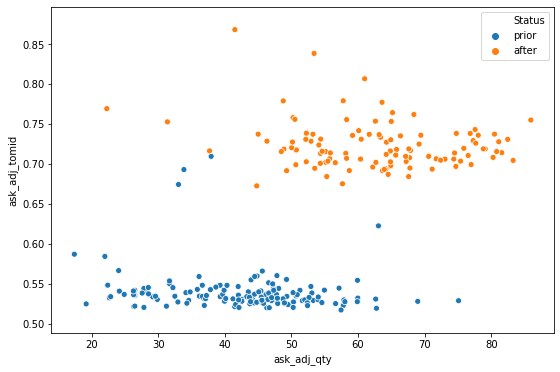

In [147]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='ask_adj_qty', y='ask_adj_tomid',\
                hue='Status', data=OB_UZ_STATS_SPREADS);

### Costs

In [148]:
PRIOR_MEAN_COST = cme.cost_mean(PRIOR_COST_STATS, 100)

In [149]:
PRIOR_MEAN_COST['Status'] = 'prior'

In [150]:
AFTER_MEAN_COST = cme.cost_mean(AFTER_COST_STATS, 100)

In [151]:
AFTER_MEAN_COST['Status'] = 'after'

In [152]:
MEAN_COST_STATS = pd.concat([PRIOR_MEAN_COST, AFTER_MEAN_COST], sort=False)

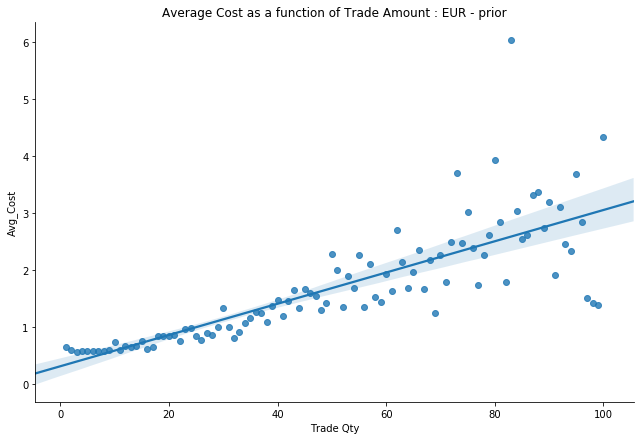

In [153]:
sns.lmplot(x='Trade Qty', y='Avg_Cost', data=PRIOR_MEAN_COST.reset_index(),\
          height=6, aspect=1.5);
plt.title('Average Cost as a function of Trade Amount : '+CURR+' - prior');

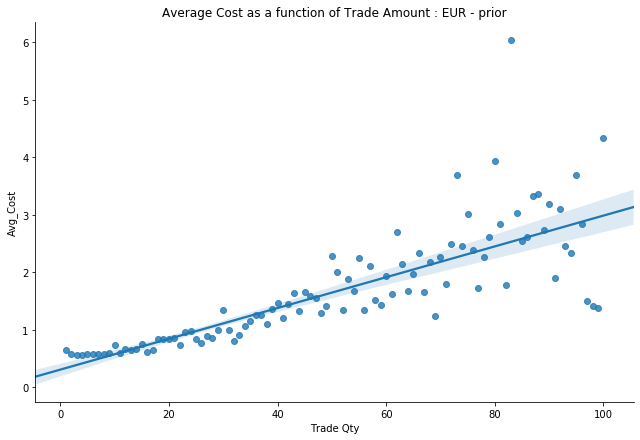

In [154]:
sns.lmplot(x='Trade Qty', y='Avg_Cost', data=PRIOR_MEAN_COST.reset_index(),\
          height=6, aspect=1.5, robust=True);
plt.title('Average Cost as a function of Trade Amount : '+CURR+' - prior');

In [155]:
cme.lin_reg(cme.cost_mean(PRIOR_COST_STATS, 50).reset_index(), 'Trade Qty', 'Avg_Cost')

                            OLS Regression Results                            
Dep. Variable:               Avg_Cost   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     198.3
Date:                Thu, 12 Sep 2019   Prob (F-statistic):           1.15e-18
Time:                        17:41:50   Log-Likelihood:                 18.551
No. Observations:                  50   AIC:                            -33.10
Df Residuals:                      48   BIC:                            -29.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3847      0.049      7.862      0.0

In [156]:
cme.lin_reg_rob(cme.cost_mean(PRIOR_COST_STATS, 50).reset_index(), 'Trade Qty', 'Avg_Cost')

                    Robust linear Model Regression Results                    
Dep. Variable:               Avg_Cost   No. Observations:                   50
Model:                            RLM   Df Residuals:                       48
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 12 Sep 2019                                         
Time:                        17:41:50                                         
No. Iterations:                    21                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4113      0.039     10.436      0.0

In [157]:
cme.lin_reg(cme.cost_mean(PRIOR_COST_STATS, 100).reset_index(), 'Trade Qty', 'Avg_Cost')

                            OLS Regression Results                            
Dep. Variable:               Avg_Cost   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     177.6
Date:                Thu, 12 Sep 2019   Prob (F-statistic):           9.96e-24
Time:                        17:41:50   Log-Likelihood:                -88.868
No. Observations:                 100   AIC:                             181.7
Df Residuals:                      98   BIC:                             186.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3082      0.120      2.573      0.0

In [158]:
cme.lin_reg_rob(cme.cost_mean(PRIOR_COST_STATS, 100).reset_index(), 'Trade Qty', 'Avg_Cost')

                    Robust linear Model Regression Results                    
Dep. Variable:               Avg_Cost   No. Observations:                  100
Model:                            RLM   Df Residuals:                       98
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 12 Sep 2019                                         
Time:                        17:41:50                                         
No. Iterations:                    24                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3097      0.065      4.732      0.0

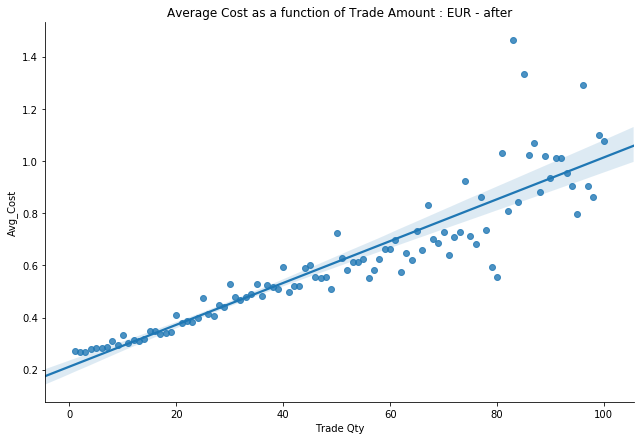

In [159]:
sns.lmplot(x='Trade Qty', y='Avg_Cost', data=AFTER_MEAN_COST.reset_index(),\
          height=6, aspect=1.5);
plt.title('Average Cost as a function of Trade Amount : '+CURR+' - after');

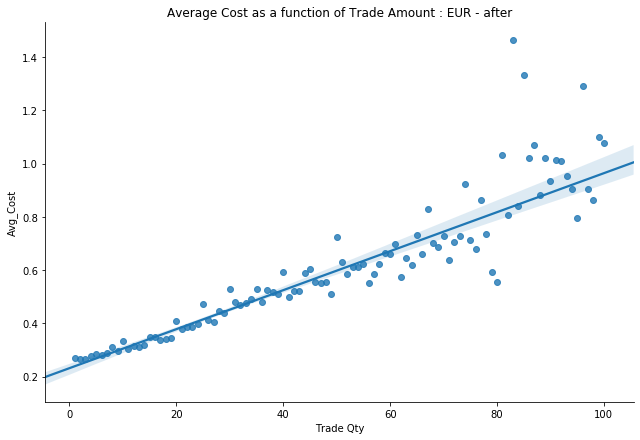

In [160]:
sns.lmplot(x='Trade Qty', y='Avg_Cost', data=AFTER_MEAN_COST.reset_index(),\
          height=6, aspect=1.5, robust=True);
plt.title('Average Cost as a function of Trade Amount : '+CURR+' - after');

In [161]:
cme.lin_reg(cme.cost_mean(AFTER_COST_STATS, 50).reset_index(), 'Trade Qty', 'Avg_Cost')

                            OLS Regression Results                            
Dep. Variable:               Avg_Cost   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     502.2
Date:                Thu, 12 Sep 2019   Prob (F-statistic):           4.53e-27
Time:                        17:41:59   Log-Likelihood:                 100.33
No. Observations:                  50   AIC:                            -196.7
Df Residuals:                      48   BIC:                            -192.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2382      0.010     24.989      0.0

In [162]:
cme.lin_reg_rob(cme.cost_mean(AFTER_COST_STATS, 50).reset_index(), 'Trade Qty', 'Avg_Cost')

                    Robust linear Model Regression Results                    
Dep. Variable:               Avg_Cost   No. Observations:                   50
Model:                            RLM   Df Residuals:                       48
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 12 Sep 2019                                         
Time:                        17:41:59                                         
No. Iterations:                    22                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2411      0.007     34.604      0.0

In [163]:
cme.lin_reg(cme.cost_mean(AFTER_COST_STATS, 100).reset_index(), 'Trade Qty', 'Avg_Cost')

                            OLS Regression Results                            
Dep. Variable:               Avg_Cost   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     441.7
Date:                Thu, 12 Sep 2019   Prob (F-statistic):           4.38e-38
Time:                        17:41:59   Log-Likelihood:                 79.683
No. Observations:                 100   AIC:                            -155.4
Df Residuals:                      98   BIC:                            -150.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2118      0.022      9.538      0.0

In [164]:
cme.lin_reg_rob(cme.cost_mean(AFTER_COST_STATS, 100).reset_index(), 'Trade Qty', 'Avg_Cost')

                    Robust linear Model Regression Results                    
Dep. Variable:               Avg_Cost   No. Observations:                  100
Model:                            RLM   Df Residuals:                       98
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 12 Sep 2019                                         
Time:                        17:41:59                                         
No. Iterations:                    33                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2315      0.011     21.285      0.0

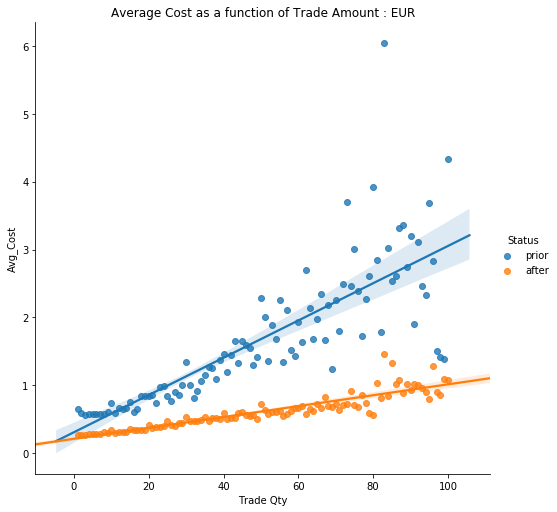

In [165]:
cme.regr_plot(MEAN_COST_STATS.reset_index(), 'Trade Qty', 'Avg_Cost',\
    'Average Cost as a function of Trade Amount : '+CURR)

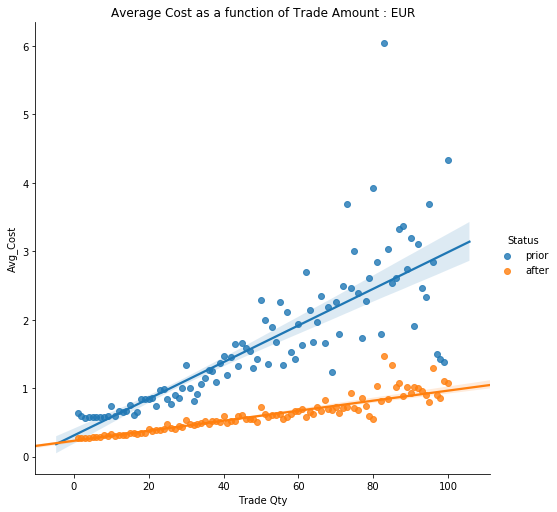

In [166]:
cme.regr_plot(MEAN_COST_STATS.reset_index(), 'Trade Qty', 'Avg_Cost',\
    'Average Cost as a function of Trade Amount : '+CURR, True)

## Eta prediction

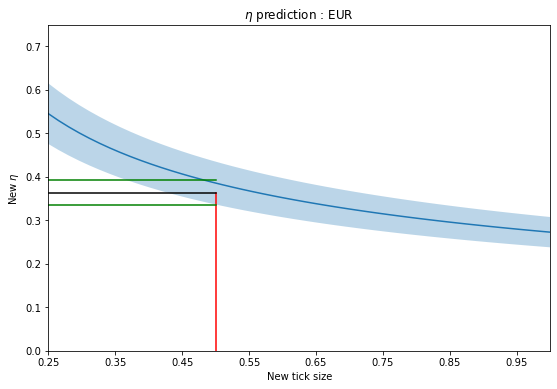

In [167]:
cme.plot_eta(TICK_PRIOR, TICK_AFTER,\
    TABLE_MATHIEU.loc['prior']['eta1'], TABLE_MATHIEU.loc['after']['eta1'],\
    TABLE_MATHIEU_ERR.loc['prior']['eta1'], TABLE_MATHIEU_ERR.loc['after']['eta1'],\
    CURR)